In [15]:
# Ignoring unnecessary import warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn('ignore')

# Importing dataframe and series packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Importing time operator packages
import time
import datetime as dt
from datetime import datetime

# Importing plotting packages
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# Keeping plots embedded within our Jupyter Notebook
%matplotlib inline
# Importing dark theme for data visualizations
__import__ ('jupyterthemes').jtplot.style()

# Importing HTML and JSON display packages
import IPython as ipy
import IPython.display
from IPython.display import Image, display, display_html
import json

# Importing geographical map packages
import ipyleaflet as ipl
from ipyleaflet import Map, GeoData, basemaps, WidgetControl, GeoJSON,  \
                       LayersControl, Icon, Marker, basemap_to_tiles,    \
                       Choropleth, MarkerCluster, Heatmap, SearchControl, \
                       FullScreenControl
import ipywidgets as ipw
from ipywidgets import Text, HTML, link, FloatSlider
import branca as br
from branca.colormap import linear
import geopandas as gpd
from geopandas import read_file
import mapclassify as mc
import folium as fol

# Importing extra packages
import os
import requests
##### CHECK IF USED
# --------

In [10]:
# Calculating our total execution time to read file
start_time = time.time()
#raw_df = pd.read_csv(redfin_url, compression='gzip', sep='\t', on_bad_lines='skip')
execution_time = (time.time() - start_time)

In [7]:
# Version checks for compatibility between all required packages

print(
    '\n STATUS   | PACKAGE      | VERSIION       | FUNCTION'.format(np.__version__),
    '\n ---------------------------------------------------------------'.format(np.__version__),
    '\n Active   | numpy        | v.{}       | High-performance array-processing package'.format(np.__version__),
    '\n Active   | pandas       | v.{}        | Dataframe analysis, creation, and manipulation tool'.format(pd.__version__),
    '\n Active   | seaborn      | v.{}       | Data visualization library for creating statistical graphics'.format(sns.__version__),
    '\n Active   | matplotlib   | v.{}        | Comprehensive library for plotting visualizations'.format(mpl.__version__),
    '\n Active   | ipython      | v.{}       | Provides a rich architecture for interactive computing'.format(ipy.__version__),
    '\n Active   | json         | v.{}        | Stores + transmits data objects consisting of attributes'.format(json.__version__),
    '\n Active   | ipyleaflet   | v.{}       | Interactive widgets library for dynamic leaflet maps'.format(ipl.__version__),
    '\n Active   | ipywidgets   | v.{}        | Interactive HTML widgets for Jupyter notebooks and the IPython kernel'.format(ipw.__version__),
    '\n Active   | branca       | v.{}        | Generates complex HTML + JS pages'.format(br.__version__),
    '\n Active   | geopandas    | v.{}       | Provides geospatial operations in pandas and a high-level interface'.format(gpd.__version__),
    '\n Active   | mapclassify  | v.{}        | Implements a family of classification schemes for choropleth maps'.format(mc.__version__),
    '\n Active   | folium       | v.{} | Data visualization library to help visualize geospatial data'.format(fol.__version__),
    '\n Active   | requests     | v.{}       | Robust HTTP library to obtain data from the internet'.format(requests.__version__),

    '\n\n Inactive | libpysal     | v.{}        | Spatial analysis library meta-package'.format('4.6.2'),
    '\n Inactive | numba        | v.{}    | NumPy-aware optimizing compiler using LLVM'.format('0.55.0rc1'),
)

# NOTE: Importing libpysal returns 'ImportError: Numba needs NumPy 1.21 or less'
#       When downgrading NumPy with pip, fatal compatability error occurs with multiple packages that require NumPy 1.22.1 or greater
#       Attempted numerous pip / conda installs with numba + llvmlite
#       Deciding to forgo the use of libpysal for this project


 STATUS   | PACKAGE      | VERSIION       | FUNCTION 
 --------------------------------------------------------------- 
 Active   | numpy        | v.1.23.1       | High-performance array-processing package 
 Active   | pandas       | v.1.4.3        | Dataframe analysis, creation, and manipulation tool 
 Active   | seaborn      | v.0.11.2       | Data visualization library for creating statistical graphics 
 Active   | matplotlib   | v.3.4.3        | Comprehensive library for plotting visualizations 
 Active   | ipython      | v.7.29.0       | Provides a rich architecture for interactive computing 
 Active   | json         | v.2.0.9        | Stores + transmits data objects consisting of attributes 
 Active   | ipyleaflet   | v.0.17.0       | Interactive widgets library for dynamic leaflet maps 
 Active   | ipywidgets   | v.7.6.5        | Interactive HTML widgets for Jupyter notebooks and the IPython kernel 
 Active   | branca       | v.0.5.0        | Generates complex HTML + JS pages 


Execution time: 17.53 minutes (1051.97 seconds)


In [75]:
# Calculating our total execution time to read file
start_time = time.time()

# Obtaining data from Redfin's data center (https://www.redfin.com/news/data-center/)
redfin_url = 'https://redfin-public-data.s3.us-west-2.amazonaws.com/redfin_market_tracker/zip_code_market_tracker.tsv000.gz'
# NOTE: Reading the redfin_url file will take an avg. of **1.5 - 3** minutes due to massive file size
raw_df = pd.read_csv(redfin_url, compression='gzip', sep='\t', on_bad_lines='skip')

# Calculating our total execution time to read file
execution_time = (time.time() - start_time)

print(
    'Execution time: {} minutes ({:.2f} seconds)'
    .format(
        str(round(execution_time/60,2)),
        (round(execution_time, 2))
    )
)

display(raw_df.shape)
print('Num of rows: {:0,}'.format(len(raw_df)))
print('Num of cols: {:0,}'.format(len(raw_df.columns)))
raw_df.head()

Execution time: 2.6 minutes (155.79 seconds)


(6020132, 58)

Num of rows: 6,020,132
Num of cols: 58


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2021-12-01,2022-02-28,90,zip code,2,39641,f,Zip Code: 95448,NaN,California,CA,Single Family Residential,6,945500.0,0.027717,-0.113247,1100000.0,-0.056846,0.004566,622.583140,0.048797,0.077815,718.237407,0.112958,0.240122,44.0,-0.200000,0.000000,6.0,-0.40000,-0.400000,33.0,0.178571,-0.440678,36.0,0.200000,-0.400000,NaN,NaN,NaN,78.0,1.0,18.5,1.003355,0.009444,0.024138,0.340909,-0.022727,0.159091,NaN,NaN,NaN,0.333333,0.133333,0.133333,"Santa Rosa, CA",42220,2022-07-10 14:38:35
1,2017-03-01,2017-05-31,90,zip code,2,30050,f,Zip Code: 70426,NaN,Louisiana,LA,Single Family Residential,6,148497.5,0.000000,NaN,76005.0,-0.074351,NaN,52.615660,0.000000,NaN,46.810238,-0.196424,NaN,2.0,0.000000,NaN,NaN,NaN,NaN,2.0,-0.600000,NaN,10.0,0.000000,NaN,NaN,NaN,NaN,1446.5,0.0,NaN,0.960870,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Bogalusa, LA",14220,2022-07-10 14:38:35
2,2014-03-01,2014-05-31,90,zip code,2,18470,f,Zip Code: 44072,NaN,Ohio,OH,Single Family Residential,6,167200.0,-0.071111,-0.375653,439750.0,0.355371,0.332576,81.007752,0.062296,-0.284186,130.902413,0.164418,0.124927,13.0,0.181818,-0.133333,1.0,-0.80000,-0.666667,26.0,0.083333,0.083333,46.0,0.210526,0.069767,NaN,NaN,NaN,75.0,-11.0,-28.0,0.968193,-0.002355,0.029987,0.076923,-0.013986,0.010256,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Cleveland, OH",17460,2022-07-10 14:38:35
3,2015-09-01,2015-11-30,90,zip code,2,31066,f,Zip Code: 72501,NaN,Arkansas,AR,All Residential,-1,61000.0,-0.188285,-0.065134,42543.5,-0.058501,-0.278924,26.967286,-0.255338,-0.246233,26.623309,-0.145919,-0.268536,1.0,-0.500000,-0.500000,NaN,NaN,NaN,4.0,0.333333,3.000000,5.0,0.000000,1.500000,NaN,NaN,NaN,200.0,105.5,82.0,0.898380,-0.127108,-0.087150,0.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Batesville, AR",12900,2022-07-10 14:38:35
4,2018-09-01,2018-11-30,90,zip code,2,11034,f,Zip Code: 27615,NaN,North Carolina,NC,All Residential,-1,300000.0,-0.009083,0.048951,299950.0,0.034667,0.016780,147.435317,0.011395,0.090195,146.152300,-0.019559,0.019538,178.0,-0.144231,-0.082474,43.0,-0.31746,-0.122449,172.0,-0.135678,-0.039106,146.0,-0.013514,-0.081761,NaN,NaN,NaN,51.0,2.0,1.0,0.993882,-0.002792,0.008813,0.348315,-0.021878,0.054500,NaN,NaN,NaN,0.209302,0.034699,0.066445,"Raleigh, NC",39580,2022-07-10 14:38:35


In [7]:
# Filtering dataframe by state code
state_code = 'GA'
df_state_filter = raw_df.loc[raw_df['state_code'] == state_code]

print(
    ' Total rows in raw_df: {:0,}'.format(len(raw_df)),
    '\n Total rows in '+state_code+'-filtered df: {:0,} ({:.2f}%)'
    .format(
        len(df_state_filter),
        (len(df_state_filter) / len(raw_df))*100
    )
)
df_state_filter.sample(3)

 Total rows in raw_df: 6,020,132 
 Total rows in GA-filtered df: 139,932 (2.32%)


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
4069756,2019-03-01,2019-05-31,90,zip code,2,12843,f,Zip Code: 30650,NaN,Georgia,GA,All Residential,-1,250000.0,-0.013807,0.010101,299900.0,-0.077089,0.111152,119.408004,0.019048,0.095943,131.113801,0.032648,0.143348,51.0,0.108696,-0.177419,8.0,-0.428571,0.142857,73.0,-0.039474,-0.160920,104.0,0.029703,0.019608,NaN,NaN,NaN,77.0,-2.5,-17.5,0.971913,0.022677,0.005864,0.196078,0.000426,0.099304,NaN,NaN,NaN,0.000000,-0.071429,-0.285714,"Atlanta, GA",12060,2022-07-10 14:38:35
5764905,2020-10-01,2020-12-31,90,zip code,2,12719,f,Zip Code: 30452,NaN,Georgia,GA,Single Family Residential,6,249900.0,-0.218940,1.173043,279500.0,0.301816,NaN,136.856517,0.071260,1.327751,117.109375,0.180920,NaN,3.0,0.500000,2.000000,2.0,NaN,NaN,3.0,0.500000,NaN,1.0,-0.750000,NaN,NaN,NaN,NaN,45.0,-88.5,-154.0,0.956804,-0.031918,0.065331,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.500000,NaN,NaN,"Statesboro, GA",44340,2022-07-10 14:38:35
1802900,2020-06-01,2020-08-31,90,zip code,2,12543,f,Zip Code: 30213,NaN,Georgia,GA,All Residential,-1,237965.0,0.024607,0.233011,245000.0,0.022828,0.114143,97.631965,0.014332,0.081238,101.468625,0.018555,0.118825,279.0,0.048872,-0.031250,70.0,-0.041096,-0.102564,208.0,-0.083700,-0.345912,89.0,-0.190909,-0.697279,NaN,NaN,NaN,38.0,-6.5,0.0,0.989407,-0.002044,-0.003292,0.293907,-0.003086,-0.063732,NaN,NaN,NaN,0.442857,0.004501,0.058242,"Atlanta, GA",12060,2022-07-10 14:38:35


In [8]:
# Examining data types and non-null counts
print(str('Data types (numeric): \n------').upper())
df_state_filter.info()

# Sorting values by count then normalizing all values
print(str('\nData types (normalized): \n------').upper())
df_state_filter.count().sort_values()/len(df_state_filter)

DATA TYPES (NUMERIC): 
------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 139932 entries, 113 to 6020038
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   period_begin                    139932 non-null  object 
 1   period_end                      139932 non-null  object 
 2   period_duration                 139932 non-null  int64  
 3   region_type                     139932 non-null  object 
 4   region_type_id                  139932 non-null  int64  
 5   table_id                        139932 non-null  int64  
 6   is_seasonally_adjusted          139932 non-null  object 
 7   region                          139932 non-null  object 
 8   city                            0 non-null       float64
 9   state                           139932 non-null  object 
 10  state_code                      139932 non-null  object 
 11  property_type                   139932 non-nu

months_of_supply_yoy              0.000000
price_drops_yoy                   0.000000
price_drops_mom                   0.000000
price_drops                       0.000000
city                              0.000000
months_of_supply                  0.000000
months_of_supply_mom              0.000000
pending_sales_yoy                 0.653796
off_market_in_two_weeks_yoy       0.653796
off_market_in_two_weeks_mom       0.674878
pending_sales_mom                 0.674878
pending_sales                     0.764364
off_market_in_two_weeks           0.764364
inventory_yoy                     0.822871
median_list_ppsf_yoy              0.827766
median_list_price_yoy             0.832933
new_listings_yoy                  0.833169
median_ppsf_yoy                   0.868865
median_dom_yoy                    0.875197
inventory_mom                     0.876669
avg_sale_to_list_yoy              0.877912
sold_above_list_yoy               0.878863
homes_sold_yoy                    0.878863
median_sale

In [9]:
# Dropping all cols with null values
df_state_filter = df_state_filter.drop(
    columns=[
        'months_of_supply_yoy',
        'price_drops_yoy',
        'price_drops_mom',
        'price_drops',
        'city',
        'months_of_supply',
        'months_of_supply_mom'
    ]
)

In [10]:
# Observing new dataframe for any additional unnecessary cols
df_state_filter.sample(3)

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
2048774,2017-07-01,2017-09-30,90,zip code,2,13098,f,Zip Code: 31401,Georgia,GA,All Residential,-1,272500.0,-0.068535,-0.052174,299500.0,0.032759,-0.001334,186.079545,-0.029270,-0.085892,217.647059,0.119466,0.131328,92.0,-0.163636,-0.089109,18.0,-0.1000,0.125000,119.0,-0.118519,-0.055556,197.0,-0.061905,-0.052885,89.5,2.5,-23.5,0.971651,-0.003374,0.022458,0.152174,0.006719,0.092768,0.055556,-0.094444,0.055556,"Savannah, GA",42340,2022-07-10 14:38:35
3538743,2022-04-01,2022-06-30,90,zip code,2,12952,f,Zip Code: 31016,Georgia,GA,All Residential,-1,549900.0,NaN,NaN,549900.0,NaN,NaN,147.465809,NaN,NaN,147.465809,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,"Macon, GA",31420,2022-07-10 14:38:35
19512,2015-08-01,2015-10-31,90,zip code,2,12386,f,Zip Code: 30016,Georgia,GA,Single Family Residential,6,119500.0,0.008864,0.086858,130000.0,0.040000,0.053058,64.591897,-0.003122,0.126920,67.754897,0.003736,0.067275,207.0,-0.059091,0.277778,45.0,-0.0625,-0.196429,290.0,-0.102167,0.150794,445.0,-0.049145,0.473510,65.0,9.0,22.0,0.960119,-0.004845,-0.017504,0.169082,0.005446,-0.084004,0.288889,0.101389,-0.121825,"Atlanta, GA",12060,2022-07-10 14:38:35


In [11]:
# Examining cols with low nunique values
df_state_filter.nunique().sort_values()
# NOTE: These cols have pre-filtered values due to previous state_code filtering

last_updated                           1
period_duration                        1
region_type                            1
region_type_id                         1
is_seasonally_adjusted                 1
state                                  1
state_code                             1
property_type_id                       5
property_type                          5
parent_metro_region                   36
parent_metro_region_metro_code        36
period_begin                         124
period_end                           124
pending_sales                        183
region                               492
table_id                             492
homes_sold                           565
inventory                            615
new_listings                         655
median_dom                          1160
median_dom_mom                      1389
median_dom_yoy                      1958
off_market_in_two_weeks             2764
pending_sales_mom                   4013
pending_sales_yo

In [12]:
# Dropping all unnecessary cols with low nunique values
df_state_filter = df_state_filter.drop(
    columns=[
        'last_updated',
        'period_duration',
        'region_type',
        'region_type_id',
        'is_seasonally_adjusted',
        'state',
        'state_code',
        'property_type_id'
    ]
)

In [13]:
df_state_filter.sample(3)

,period_begin,period_end,table_id,region,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code
5082537,2022-02-01,2022-04-30,12500,Zip Code: 30143,Single Family Residential,362500.0,-0.058442,0.306306,358900.0,-0.009111,0.229110,190.349517,0.020837,0.292520,201.772006,0.030854,0.276839,194.0,0.134503,-0.130045,48.0,-0.272727,-0.238095,220.0,0.111111,-0.120000,144.0,0.116279,-0.225806,27.0,-7.0,-12.0,1.003769,0.014404,0.025121,0.438144,0.081419,0.155633,0.5625,0.138258,0.165675,"Atlanta, GA",12060
572341,2013-07-01,2013-09-30,12494,Zip Code: 30137,All Residential,85000.0,0.096067,0.292776,76000.0,0.045680,0.369369,58.808725,0.002632,0.300052,41.942605,0.000000,-0.201957,5.0,0.250000,-0.166667,2.0,0.000000,0.000000,7.0,-0.300000,0.400000,6.0,-0.333333,0.500000,21.0,2.5,13.0,1.039123,-0.012290,-0.085153,0.200000,-0.300000,-0.633333,0.0000,-0.500000,0.000000,"Atlanta, GA",12060
596397,2016-04-01,2016-06-30,12390,Zip Code: 30021,Condo/Co-op,60000.0,0.428571,1.173913,46600.0,0.055493,0.795761,45.471519,0.346823,0.650814,35.175840,0.000000,0.335715,2.0,-0.333333,-0.600000,NaN,NaN,NaN,8.0,-0.200000,0.333333,9.0,-0.100000,0.285714,16.5,-43.5,-113.5,1.017955,0.164829,0.132847,1.000000,0.666667,0.600000,NaN,NaN,NaN,"Atlanta, GA",12060


In [14]:
# Optimizing period col datatypes from str to datetime64
df_state_filter['period_begin'] = pd.to_datetime(df_state_filter['period_begin'])
df_state_filter['period_end'] = pd.to_datetime(df_state_filter['period_end'])

In [15]:
# Confirming dtype conversion from object to datetime64
df_state_filter.info(show_counts=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139932 entries, 113 to 6020038
Data columns (total 43 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   period_begin                    datetime64[ns]
 1   period_end                      datetime64[ns]
 2   table_id                        int64         
 3   region                          object        
 4   property_type                   object        
 5   median_sale_price               float64       
 6   median_sale_price_mom           float64       
 7   median_sale_price_yoy           float64       
 8   median_list_price               float64       
 9   median_list_price_mom           float64       
 10  median_list_price_yoy           float64       
 11  median_ppsf                     float64       
 12  median_ppsf_mom                 float64       
 13  median_ppsf_yoy                 float64       
 14  median_list_ppsf                float64       
 1

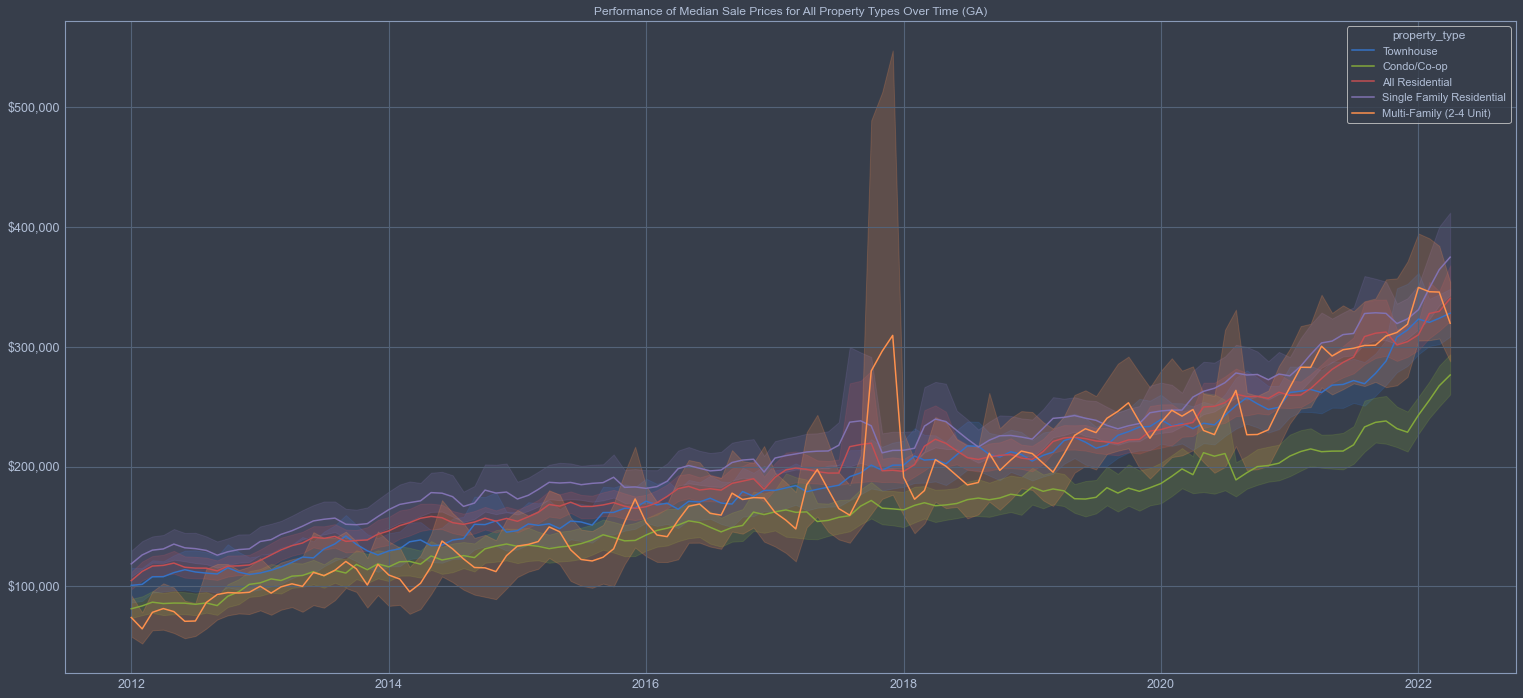

In [16]:
fig, ax = plt.subplots(figsize=(26,12))
sns.set_context('notebook')
g = sns.lineplot(data=df_state_filter, x='period_begin', y='median_sale_price', hue='property_type');
g.set_title('Performance of Median Sale Prices for All Property Types Over Time ('+state_code+')')
g.set_yticklabels('${:,.0f}'.format(y) + '' for y in g.get_yticks())
g.set_ylabel('')
g.set_xlabel('');

In [17]:
# Defining a function to move indiviudal cols to given index
def move_indiv_col(df, col, new_i):
    old_loc = df.pop(col)
    df.insert(new_i, col, old_loc)

In [18]:
# Relocating key identifier cols to front
move_indiv_col(df_state_filter, 'property_type', 0)
move_indiv_col(df_state_filter, 'parent_metro_region', 1)

df_state_filter.sample(5)

,property_type,parent_metro_region,period_begin,period_end,table_id,region,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
5969669,Townhouse,"Gainesville, GA",2020-02-01,2020-04-30,12773,Zip Code: 30542,192000.0,0.036717,0.132743,198900.0,0.000000,0.106845,106.436782,0.000000,0.074627,107.200544,0.007176,-0.020040,16.0,2.200000,3.000000,6.0,-0.142857,1.000000,19.0,0.000000,1.375000,6.0,-0.142857,1.000000,21.0,2.0,-15.0,0.985569,0.015546,-0.010325,0.062500,0.062500,-0.187500,0.166667,-0.261905,-0.833333,23580
21276,Condo/Co-op,"Atlanta, GA",2012-12-01,2013-02-28,12643,Zip Code: 30341,137900.0,0.077344,0.702469,119500.0,-0.073643,0.097337,110.098177,0.274271,0.220840,110.081822,-0.018186,0.283662,23.0,-0.206897,0.095238,4.0,-0.428571,-0.555556,22.0,-0.120000,-0.371429,20.0,-0.230769,-0.615385,56.0,-26.0,-10.0,0.978973,0.003903,-0.006163,0.130435,0.061469,-0.107660,0.250000,-0.321429,0.250000,12060
5237849,All Residential,"Macon, GA",2018-02-01,2018-04-30,12986,Zip Code: 31052,199800.0,-0.000500,0.363823,164000.0,0.025641,-0.158543,77.910340,-0.004231,0.036948,73.340198,-0.087062,-0.061784,19.0,0.357143,0.727273,3.0,-0.400000,2.000000,18.0,-0.052632,0.800000,24.0,0.142857,0.263158,93.0,-32.0,-111.0,0.963006,-0.001012,-0.022935,0.210526,-0.003759,0.210526,0.333333,0.333333,0.333333,31420
1861127,All Residential,"Atlanta, GA",2017-05-01,2017-07-31,12585,Zip Code: 30274,75000.0,0.000667,0.090909,88450.0,0.041814,0.340152,52.396166,0.002906,0.092945,57.003760,0.014267,0.175594,72.0,0.125000,0.090909,23.0,0.210526,0.352941,92.0,0.033708,0.022222,64.0,-0.044776,-0.418182,32.0,1.5,-6.0,0.977013,-0.006572,0.002868,0.277778,-0.019097,0.020202,0.260870,-0.107551,0.260870,12060
5847401,Single Family Residential,"Albany, GA",2014-08-01,2014-10-31,13236,Zip Code: 31763,116100.0,0.550067,NaN,155000.0,0.060192,NaN,76.381579,0.331834,NaN,89.367553,-0.047035,NaN,7.0,1.333333,NaN,3.0,-0.250000,NaN,33.0,0.031250,NaN,51.0,0.000000,NaN,63.0,10.0,NaN,0.961234,0.013517,NaN,0.142857,0.142857,NaN,0.000000,0.000000,NaN,10500


In [19]:
# Descriptive statistics of all rows provided from Redfin data
df_state_filter.describe()

,table_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
count,139932.000000,1.399320e+05,133932.000000,122981.000000,1.306100e+05,124557.000000,116554.000000,138217.000000,132335.000000,121582.000000,129646.000000,123720.000000,115831.000000,139932.000000,133932.000000,122981.000000,106959.000000,94437.000000,91487.000000,130644.000000,124596.000000,116587.000000,128256.000000,122674.000000,115146.000000,139439.000000,133414.000000,122468.000000,139752.000000,133764.000000,122848.000000,139932.000000,133932.000000,122981.000000,106959.000000,94437.000000,91487.000000,139932.000000
mean,12697.619701,1.984058e+05,0.040368,0.757768,2.164553e+05,0.044586,0.197003,103.910019,0.027029,0.683322,112.214491,0.027437,0.151954,56.711331,0.061211,0.389793,19.310278,0.192504,0.354435,71.810424,0.053946,0.213251,69.361199,0.036270,0.083247,73.536589,-0.819419,-10.113675,0.966822,0.000474,0.006420,0.207353,0.002669,0.028556,0.319676,0.000987,0.040655,18862.014836
std,353.757153,1.685967e+05,0.427469,176.805354,1.848976e+05,1.058785,1.618150,64.865120,0.287669,171.046090,65.428487,0.770950,1.179661,82.795821,0.407593,4.330092,24.752626,0.857967,1.306849,97.814327,0.484719,1.127379,93.447116,0.438507,0.991590,104.083202,78.007614,126.340338,0.057181,0.031556,0.060289,0.219862,0.124647,0.235475,0.284487,0.291198,0.296488,11580.429545
min,12372.000000,5.500000e+02,-0.979374,-0.991429,6.750000e+02,-0.993506,-0.993910,0.116550,-0.964409,-0.985569,0.572082,-0.993447,-0.994635,1.000000,-0.909091,-0.976744,1.000000,-0.952381,-0.966667,1.000000,-0.944444,-0.981818,1.000000,-0.949153,-0.990741,1.000000,-15715.000000,-15618.000000,0.500000,-0.759574,-1.143197,0.000000,-1.000000,-1.000000,0.000000,-1.500000,-1.750000,10500.000000
25%,12478.000000,1.093000e+05,-0.023529,-0.004739,1.249000e+05,-0.029851,-0.010051,64.874884,-0.013477,0.017969,73.695106,-0.015861,0.014625,3.000000,-0.100000,-0.148148,2.000000,-0.250000,-0.181818,6.000000,-0.120879,-0.167630,6.000000,-0.095238,-0.314815,29.500000,-6.000000,-28.500000,0.952138,-0.004510,-0.008297,0.000000,-0.019841,-0.044444,0.000000,-0.100427,-0.069444,12060.000000
50%,12611.000000,1.682500e+05,0.000000,0.111111,1.825000e+05,0.000000,0.096576,93.002583,0.000000,0.100437,99.350974,0.002234,0.087563,17.000000,0.000000,0.035714,9.000000,0.000000,0.055556,25.000000,0.000000,0.007605,27.000000,0.000000,-0.068182,53.000000,0.000000,-7.000000,0.975362,0.000000,0.005314,0.166667,0.000000,0.001212,0.303030,0.000000,0.000000,12060.000000
75%,12880.000000,2.500000e+05,0.046351,0.276923,2.690000e+05,0.050524,0.242725,127.118633,0.034088,0.234229,134.920635,0.034755,0.200856,79.000000,0.125000,0.333333,27.000000,0.333333,0.500000,104.000000,0.139785,0.275000,99.000000,0.084071,0.180000,90.000000,5.000000,11.000000,0.990588,0.005654,0.022148,0.285714,0.025268,0.107143,0.500000,0.103175,0.166667,23580.000000
max,16974.000000,9.100000e+06,30.028571,61999.000000,1.525000e+07,213.285714,293.814815,3218.884120,16.497260,59640.304348,3576.537911,157.772603,193.639523,672.000000,14.000000,351.000000,202.000000,24.000000,73.000000,823.000000,76.000000,100.000000,701.000000,77.000000,42.000000,15811.000000,15788.000000,15774.000000,1.886792,0.798489,0.956078,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,48180.000000


In [20]:
# Sourcing zip code county data from public Github repo
geo_data_url = 'https://raw.githubusercontent.com/scpike/us-state-county-zip/master/geo-data.csv'

# Creating dataframes for usa geo data and state geo data
df_geo_usa = pd.read_csv(geo_data_url)
df_geo_state = df_geo_usa.loc[df_geo_usa['state_abbr'] == ''+state_code+'']

print(
    'Num of rows in raw df_geo_usa dataframe: {:0,}'
    .format(len(df_geo_usa))
)
display(df_geo_usa.sample(3))

print(
    'Num of rows in filtered df_geo_usa dataframe: {:0,} ({:.2f}%)'
    .format(
        len(df_geo_state),
        (len(df_geo_state) / len(df_geo_usa))*100
    )
)
display(df_geo_state.sample(3))

Num of rows in raw df_geo_usa dataframe: 33,103


,state_fips,state,state_abbr,zipcode,county,city
26305,45,South carolina,SC,29843,Bamberg,Olar
20324,36,New york,NY,14223,Erie,Buffalo
17625,32,Nevada,NV,89414,Humboldt,Golconda


Num of rows in filtered df_geo_usa dataframe: 736 (2.22%)


,state_fips,state,state_abbr,zipcode,county,city
5849,13,Georgia,GA,30668,Wilkes,Danburg
5887,13,Georgia,GA,30757,Dade,Wildwood
6116,13,Georgia,GA,31645,Berrien,Ray city


In [21]:
# Viewing all unique counties provided in df_geo_state dataframe
print('Number of counties in '+state_code+' df: {:0,}'.format(df_geo_state['county'].sort_values().nunique())),
df_geo_state['county'].sort_values().unique()

Number of counties in GA df: 159


array(['Appling', 'Atkinson', 'Bacon', 'Baker', 'Baldwin', 'Banks',
       'Barrow', 'Bartow', 'Ben Hill', 'Berrien', 'Bibb', 'Bleckley',
       'Brantley', 'Brooks', 'Bryan', 'Bulloch', 'Burke', 'Butts',
       'Calhoun', 'Camden', 'Candler', 'Carroll', 'Catoosa', 'Charlton',
       'Chatham', 'Chattahoochee', 'Chattooga', 'Cherokee', 'Clarke',
       'Clay', 'Clayton', 'Clinch', 'Cobb', 'Coffee', 'Colquitt',
       'Columbia', 'Cook', 'Coweta', 'Crawford', 'Crisp', 'Dade',
       'Dawson', 'DeKalb', 'Decatur', 'Dodge', 'Dooly', 'Dougherty',
       'Douglas', 'Early', 'Echols', 'Effingham', 'Elbert', 'Emanuel',
       'Evans', 'Fannin', 'Fayette', 'Floyd', 'Forsyth', 'Franklin',
       'Fulton', 'Gilmer', 'Glascock', 'Glynn', 'Gordon', 'Grady',
       'Greene', 'Gwinnett', 'Habersham', 'Hall', 'Hancock', 'Haralson',
       'Harris', 'Hart', 'Heard', 'Henry', 'Houston', 'Irwin', 'Jackson',
       'Jasper', 'Jeff Davis', 'Jefferson', 'Jenkins', 'Johnson', 'Jones',
       'Lamar', 'Lanie

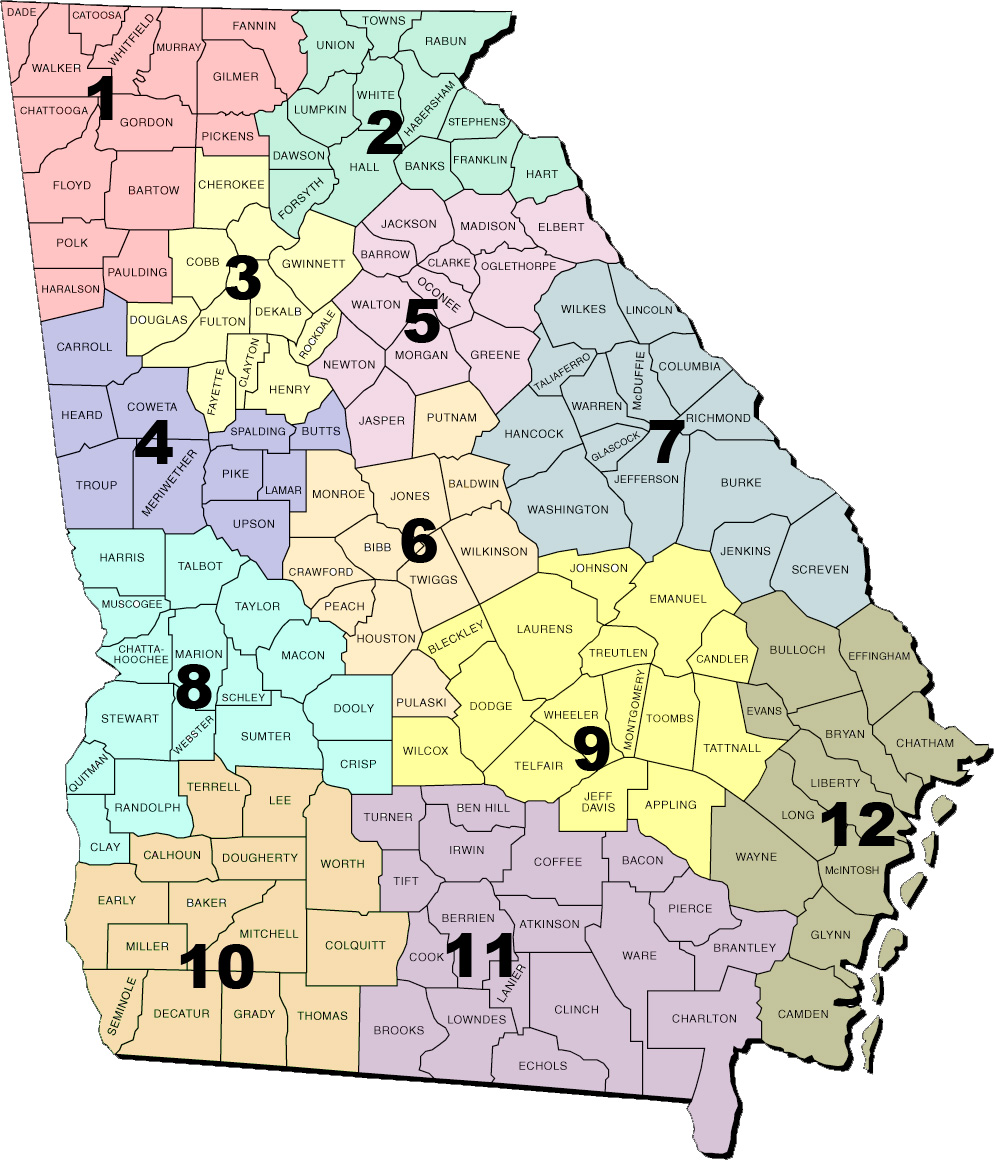

,Region One,Region Two,Region Three,Region Four,Region Five,Region Six,Region Seven,Region Eight,Region Nine,Region Ten,Region Eleven,Region Twelve
0,Bartow,Banks,Butts,Carroll,Barrow,Baldwin,Burke,Chattahoochee,Appling,Baker,Atkinson,Bryan
1,Catoosa,Dawson,Clayton,Coweta,Clarke,Bibb,Columbia,Clay,Bleckley,Calhoun,Bacon,Bulloch
2,Chattooga,Forsyth,Cobb,Douglas,Elbert,Crawford,Glascosk,Dooly,Candler,Decatur,Ben Hill,Camden
3,Cherokee,Franklyn,DeKalb,Heard,Greene,Houston,Hancock,Harris,Dodge,Dougherty,Berrien,Chatham
4,Dade,Haversham,Fayette,Lamar,Jackson,Jones,Jefferson,Macon,Emanuel,Early,Brantley,Effingham
5,Fannin,Hall,Fulton,Meriwether,Jasper,Monroe,Jenkins,Marion,Jeff Davis,Grady,Brooks,Evans
6,Floyd,Hart,Gwinnett,Pike,Madison,Peach,Lincoln,Muscogee,Johnson,Lee,Charlton,Glynn
7,Gilmer,Lumpkin,Henry,Troup,Morgan,Pulaski,McDuffie,Quitman,Laurens,Miller,Clinch,Liberty
8,Gordon,Rabun,Rockdale,Upson,Newton,Putnam,Richmond,Randolph,Montgomery,Mitchell,Coffee,Long
9,Haralson,Stephens,Spalding,NaN,Oconee,Twiggs,Screven,Schley,Tattnall,Seminole,Cook,McIntosh


In [22]:
# Displaying image and table of GA map with all regions
display(Image('https://i.imgur.com/NXpiMLM.jpeg', embed=True, height=471, width=403))
counties_by_region = pd.read_csv('C:/Users/remar/OneDrive/Desktop/Code/SynthWriter/Current Market Rental Data Analysis/GA_counties_by_region.csv')#.fillna('')
counties_by_region

# NOTE: Parsed HTML on website and wrote to .csv file on separate code file
# Website source: https://seprepnet.com/forum/index.php?topic=36.0

# TODO: Widen radius of region 3 to encompass other counties with investment potetnial
# Final list should also include ['Bartow','Paulding','Carroll','Coweta','Newton','Walton','Barrow','Forsyth', and 'Hall'] /
#    per google maps and the image here: http://holidaymapq.com/wp-content/uploads/atlanta-map-2.jpg

In [23]:
# Forming list of counties for the Atlanta Metro region (Region Three) and peripheral areas of interest
atl_counties = counties_by_region['Region Three'].dropna().tolist()
peripheral_counties = ['Bartow','Paulding','Carroll','Coweta','Newton','Walton', \
                       'Barrow','Forsyth', 'Hall', 'Douglas', 'Cherokee']

# Creatring final list of items to merge with geopandas geometry
gpd_counties = atl_counties + peripheral_counties

# Sorting list by alphabetical order
gpd_counties.sort()

print(
    ' Number of counties in final list = {} \n\n'.format(len(gpd_counties)),
    gpd_counties
)
# NOTE: Could have used counties_by_region.dropna(subset=['Region Three']) but this would tamper with rows from other regions

 Number of counties in final list = 21 

 ['Barrow', 'Bartow', 'Butts', 'Carroll', 'Cherokee', 'Clayton', 'Cobb', 'Coweta', 'DeKalb', 'Douglas', 'Fayette', 'Forsyth', 'Fulton', 'Gwinnett', 'Hall', 'Henry', 'Newton', 'Paulding', 'Rockdale', 'Spalding', 'Walton']


In [24]:
# Filtering to counties in the Atlanta Metro region (region 3 on image)
df_atl_counties = df_geo_state.loc[df_geo_state['county'].isin(gpd_counties)]

# Checking if zip code is valid
df_atl_counties['valid_zip_code'] = df_atl_counties.apply(lambda x: x['zipcode'].isnumeric(), axis=1)
print(df_atl_counties.groupby(['valid_zip_code', 'county'])['zipcode'].count().sort_index())
print(
    '\n{:0,} invalid zip codes out of {:0,} total ({:.2f}%): {}'
    .format(
        df_atl_counties.loc[df_atl_counties['valid_zip_code'] == False]['zipcode'].nunique(),
        df_atl_counties['zipcode'].nunique(),
        (df_atl_counties.loc[df_atl_counties['valid_zip_code'] == False]['zipcode'].nunique() / df_atl_counties['zipcode'].nunique())*100,
        df_atl_counties.loc[df_atl_counties['valid_zip_code'] == False]['zipcode'].unique()
    )
)

valid_zip_code  county  
False           Bartow       1
                Butts        1
                Cobb         2
True            Barrow       4
                Bartow       8
                Butts        3
                Carroll      8
                Cherokee     7
                Clayton      9
                Cobb        17
                Coweta       7
                DeKalb      28
                Douglas      4
                Fayette      5
                Forsyth      2
                Fulton      33
                Gwinnett    15
                Hall        10
                Henry        5
                Newton       5
                Paulding     3
                Rockdale     3
                Spalding     2
                Walton       5
Name: zipcode, dtype: int64

4 invalid zip codes out of 187 total (2.14%): ['300HH' '301HH' '302HH' '303HH']


In [25]:
# Filtering out our invalid zip codes
df_atl_counties_valid_zips = df_atl_counties.loc[df_atl_counties['valid_zip_code'] == True]
df_atl_counties_valid_zips.sample(5)

# Examing all cols with low nunique values (to drop along with our now unnecessary valid_zip_code col)
display(df_atl_counties_valid_zips.nunique())

# Dropping all unnecessary cols
df_atl_counties_valid_zips = df_atl_counties_valid_zips.drop(['valid_zip_code', 'state_fips', 'state_abbr'], axis=1)
df_atl_counties_valid_zips.sample(5)

state_fips          1
state               1
state_abbr          1
zipcode           183
county             21
city              130
valid_zip_code      1
dtype: int64

,state,zipcode,county,city
5576,Georgia,30120,Bartow,Cartersville
5622,Georgia,30215,Fayette,Zcta 30215
5638,Georgia,30248,Henry,Locust grove
5581,Georgia,30126,Cobb,Zcta 30126
5550,Georgia,30080,Cobb,Smyrna


In [27]:
# Parsing zip code from our region col
df_state_filter['zipcode'] = df_state_filter.apply(lambda x: x['region'].split(':')[1].strip(), axis=1)

# Merging our market data and sourced zip codes
df_merged = pd.merge(
    df_state_filter,
    df_atl_counties_valid_zips[['zipcode', 'city', 'county']],
    how='inner', # type of join (this is only going to return zip codes from BOTH tables)
    on=['zipcode'] # col to join on
)

print('Num of rows: {:0,}'.format(len(df_merged)))
print(str('Before col edits: \n-----').upper())
display(df_merged.head(2))

# Relocating key identifier cols towards front
move_indiv_col(df_merged, 'city', 1)
move_indiv_col(df_merged, 'zipcode', 2)
move_indiv_col(df_merged, 'county', 3)

# Dropping our now unnecessary region col
df_merged = df_merged.drop(['region'], axis=1)
print(str('After col edits: \n-----').upper())
display(df_merged.head(2))

Num of rows: 80,535
BEFORE COL EDITS: 
-----


,property_type,parent_metro_region,period_begin,period_end,table_id,region,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code,zipcode,city,county
0,Townhouse,"Atlanta, GA",2014-09-01,2014-11-30,12630,Zip Code: 30327,530000.0,0.060000,0.514286,342500.0,-0.308081,0.247723,184.257075,0.022467,0.263477,133.792049,-0.323211,0.040765,5.0,-0.444444,-0.444444,1.0,-0.75,0.000000,6.0,-0.333333,-0.400000,10.0,0.250000,0.250000,52.0,22.0,-4.5,0.933894,-0.024176,-0.012724,0.200000,0.088889,0.200000,1.000000,1.000000,1.000000,12060,30327,Atlanta,Fulton
1,Condo/Co-op,"Atlanta, GA",2016-02-01,2016-04-30,12630,Zip Code: 30327,175500.0,0.044643,0.271739,172450.0,-0.077561,0.078487,134.338588,0.026792,0.125320,148.383758,-0.070629,0.148736,38.0,0.027027,-0.321429,13.0,0.30,-0.071429,44.0,0.100000,-0.241379,23.0,0.045455,-0.488889,38.5,-11.5,-17.5,0.959140,-0.004189,-0.010549,0.026316,-0.000711,-0.098684,0.230769,-0.069231,-0.269231,12060,30327,Atlanta,Fulton


AFTER COL EDITS: 
-----


,property_type,city,zipcode,county,parent_metro_region,period_begin,period_end,table_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
0,Townhouse,Atlanta,30327,Fulton,"Atlanta, GA",2014-09-01,2014-11-30,12630,530000.0,0.060000,0.514286,342500.0,-0.308081,0.247723,184.257075,0.022467,0.263477,133.792049,-0.323211,0.040765,5.0,-0.444444,-0.444444,1.0,-0.75,0.000000,6.0,-0.333333,-0.400000,10.0,0.250000,0.250000,52.0,22.0,-4.5,0.933894,-0.024176,-0.012724,0.200000,0.088889,0.200000,1.000000,1.000000,1.000000,12060
1,Condo/Co-op,Atlanta,30327,Fulton,"Atlanta, GA",2016-02-01,2016-04-30,12630,175500.0,0.044643,0.271739,172450.0,-0.077561,0.078487,134.338588,0.026792,0.125320,148.383758,-0.070629,0.148736,38.0,0.027027,-0.321429,13.0,0.30,-0.071429,44.0,0.100000,-0.241379,23.0,0.045455,-0.488889,38.5,-11.5,-17.5,0.959140,-0.004189,-0.010549,0.026316,-0.000711,-0.098684,0.230769,-0.069231,-0.269231,12060


In [28]:
# Defining function to generate col counts and percentages simultaneously

def col_info(df,col):
    xs = df[col].unique()
    if str(col).endswith('y'):
        print(' '+str(col).replace('y','ies')+' in current dataset:\n -----')
        for idx, x in enumerate(xs):
                print(''+x+' Values:\n    Count:       {:0,}\n    % of Total:  ({:.2f}%)\n'
                        .format(
                            df[col].value_counts().sort_values(ascending=False)[idx],
                            (df[col].value_counts().sort_values(ascending=False)[idx] / \
                            df[col].count())*100
                        )
                )
    else:
        print(' '+col+'s in current dataset:\n -----')
        for idx, x in enumerate(xs):
                print(''+x+' Values:\n    Count:       {:0,}\n    % of Total:  ({:.2f}%)\n'
                        .format(
                            df[col].value_counts().sort_values(ascending=False)[idx],
                            (df[col].value_counts().sort_values(ascending=False)[idx] / \
                            df[col].count())*100
                        )
                )

In [29]:
df_merged['property_type'].unique()

array(['Townhouse', 'Condo/Co-op', 'All Residential',
       'Multi-Family (2-4 Unit)', 'Single Family Residential'],
      dtype=object)

In [30]:
#### TESTING FUNCTION
col_info(df_merged,'property_type')

 property_types in current dataset:
 -----
Townhouse Values:
    Count:       22,133
    % of Total:  (27.48%)

Condo/Co-op Values:
    Count:       21,756
    % of Total:  (27.01%)

All Residential Values:
    Count:       16,043
    % of Total:  (19.92%)

Multi-Family (2-4 Unit) Values:
    Count:       13,449
    % of Total:  (16.70%)

Single Family Residential Values:
    Count:       7,154
    % of Total:  (8.88%)



In [31]:
col_info(df_merged,'parent_metro_region')

 parent_metro_regions in current dataset:
 -----
Atlanta, GA Values:
    Count:       76,768
    % of Total:  (95.32%)

Gainesville, GA Values:
    Count:       3,767
    % of Total:  (4.68%)



In [32]:
### ANALYSIS ON INNER JOIN (PD MERGE FUNCTION)
display(
    df_state_filter.loc[df_state_filter['zipcode'] == '30269'].sample(),
    df_atl_counties_valid_zips.loc[df_atl_counties_valid_zips['zipcode'] == '30269'],
)

print(
    df_state_filter.shape,
    df_atl_counties_valid_zips.shape,
    df_merged.shape
)

,property_type,parent_metro_region,period_begin,period_end,table_id,region,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code,zipcode
2529712,Condo/Co-op,"Atlanta, GA",2017-05-01,2017-07-31,12580,Zip Code: 30269,157400.0,0.0,0.222999,156950.0,-0.018756,0.121873,109.610028,0.0,0.068262,115.999483,0.026843,0.078935,9.0,-0.181818,-0.1,1.0,0.0,NaN,8.0,-0.2,0.142857,3.0,0.5,-0.4,4.0,-1.0,-20.0,0.990879,0.005977,0.023358,0.222222,0.040404,0.222222,1.0,1.0,NaN,12060,30269


,state,zipcode,county,city
5651,Georgia,30269,Fayette,Peachtree city


(139932, 44) (183, 4) (80535, 45)


In [ ]:
##### HANDY METHOD OF MOVING COLS TO FRONT
# --------

#define columns to move to front
#cols_to_move = ['zipcode', 'city', 'county']

#move columns to front
#df_merged = df_merged[cols_to_move + [x for x in df_merged.columns if x not in cols_to_move]]

# Using GeoPandas and IpyLeaflet for Interactive Mapping Data

In [33]:
# Reading data on counties (with geodataframe polygons)
df_all_usa_counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_20m.zip')
display(
    type(df_all_usa_counties),
    df_all_usa_counties.shape,
    df_all_usa_counties.sample(3)
)

geopandas.geodataframe.GeoDataFrame

(3221, 13)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
45,55,139,01581129,0500000US55139,55139,Winnebago,Winnebago County,WI,Wisconsin,06,1125859770,372631716,"POLYGON ((-88.88667 44.24262, -88.76620 44.243..."
1811,45,077,01248015,0500000US45077,45077,Pickens,Pickens County,SC,South Carolina,06,1287069061,40951482,"POLYGON ((-82.94360 34.98815, -82.89756 35.056..."
970,40,095,01101832,0500000US40095,40095,Marshall,Marshall County,OK,Oklahoma,06,962153982,143719930,"POLYGON ((-96.96842 34.17268, -96.93350 34.172..."


In [34]:
# Filtering geopandas df by our state_code
df_all_ga_counties = df_all_usa_counties.loc[df_all_usa_counties['STUSPS'] == ''+state_code+'']
df_all_ga_counties.sample(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
2295,13,135,01688166,0500000US13135,13135,Gwinnett,Gwinnett County,GA,Georgia,06,1115653877,15611813,"POLYGON ((-84.26228 33.98741, -84.18202 33.997..."
3204,13,025,00351605,0500000US13025,13025,Brantley,Brantley County,GA,Georgia,06,1147972258,10291563,"POLYGON ((-82.28456 31.22445, -82.19303 31.202..."
1489,13,111,00351094,0500000US13111,13111,Fannin,Fannin County,GA,Georgia,06,1002597521,13473582,"POLYGON ((-84.62148 34.98833, -84.50905 34.988..."


In [40]:
# Preparing gpd df for inner join on 'county' col

# Renaming 'NAME' col to 'county'
df_all_ga_counties.rename(columns={'NAME':'county'}, inplace=True)

display(
    df_all_ga_counties.shape,
    df_all_ga_counties.loc[df_all_ga_counties['county'] != 'Fulton'].sample(3),
    df_merged.shape,
    df_merged.loc[df_merged['county'] == 'Fulton'].sample(3)
)

(159, 13)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,county,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
1314,13,295,00354216,0500000US13295,13295,Walker,Walker County,GA,Georgia,06,1156145202,1672676,"POLYGON ((-85.53441 34.62379, -85.49080 34.669..."
915,13,037,00344074,0500000US13037,13037,Calhoun,Calhoun County,GA,Georgia,06,726191502,8271470,"POLYGON ((-84.80796 31.51438, -84.81784 31.619..."
1625,13,235,00347593,0500000US13235,13235,Pulaski,Pulaski County,GA,Georgia,06,645583957,5046606,"POLYGON ((-83.61558 32.28856, -83.52346 32.402..."


(80535, 45)

,property_type,city,zipcode,county,parent_metro_region,period_begin,period_end,table_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
48814,Townhouse,Atlanta,30306,Fulton,"Atlanta, GA",2015-11-01,2016-01-31,12610,400000.0,0.051387,0.212121,539900.0,0.349750,0.928903,225.126263,0.026388,0.089170,227.039529,-0.075949,0.131649,13.0,-0.277778,-0.133333,NaN,NaN,NaN,9.0,0.500000,-0.653846,20.0,0.428571,0.428571,90.0,42.0,53.0,0.986902,0.009396,-0.039840,0.153846,-0.012821,-0.112821,NaN,NaN,NaN,12060
9489,Townhouse,Atlanta,30309,Fulton,"Atlanta, GA",2017-08-01,2017-10-31,12613,283000.0,0.186583,0.067925,280000.0,0.001789,0.021898,222.222222,0.056604,0.041363,245.614035,0.103923,0.117727,11.0,0.000000,-0.388889,3.0,-0.25,0.0,9.0,-0.357143,-0.400000,8.0,-0.384615,-0.333333,25.0,-17.0,-11.5,0.962858,0.001497,-0.032311,0.090909,0.000000,-0.186869,0.333333,-0.166667,0.0,12060
59212,Multi-Family (2-4 Unit),Atlanta,30331,Fulton,"Atlanta, GA",2012-03-01,2012-05-31,12634,42245.0,0.000000,NaN,29900.0,-0.562546,NaN,21.379049,0.000000,NaN,22.772277,-0.407978,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,3.0,0.500000,NaN,4.0,0.333333,NaN,65.0,0.0,NaN,0.862143,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,12060


In [41]:
display(df_all_ga_counties.sample(2),
df_merged.sample(2))

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,county,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
2638,13,257,00350028,0500000US13257,13257,Stephens,Stephens County,GA,Georgia,06,463254409,13035162,"POLYGON ((-83.45843 34.48393, -83.36504 34.675..."
1200,13,183,00326719,0500000US13183,13183,Long,Long County,GA,Georgia,06,1037006567,8862019,"POLYGON ((-81.98139 31.79458, -81.82440 32.014..."


,property_type,city,zipcode,county,parent_metro_region,period_begin,period_end,table_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
46804,All Residential,Acworth,30102,Cherokee,"Atlanta, GA",2014-02-01,2014-04-30,12463,157000.0,-0.012579,0.256000,167750.0,0.016667,0.119079,75.936551,-0.003423,0.145696,79.210314,-0.002476,0.091619,147.0,0.105263,0.088889,48.0,0.6000,-0.2,183.0,0.063953,0.033898,176.0,-0.022222,0.313433,53.0,-12.0,1.0,0.981788,-0.001369,0.008428,0.278912,0.045829,0.019652,0.270833,-0.195833,-0.112500,12060
36707,Single Family Residential,Bethlehem,30620,Barrow,"Atlanta, GA",2014-02-01,2014-04-30,12820,116950.0,0.039556,0.175377,142400.0,0.096228,0.301051,64.962374,-0.008049,0.155200,75.803982,0.044411,0.226706,50.0,0.086957,-0.090909,21.0,0.3125,1.1,74.0,-0.075000,0.193548,58.0,-0.134328,0.234043,33.0,-19.0,-2.0,0.984266,0.005540,-0.022892,0.320000,0.037391,-0.134545,0.238095,-0.074405,-0.261905,12060


In [42]:
# Dropping datetime cols since these are not JSON iterable (datetimes cause mapping error)
df_merged_no_time = df_merged.drop(columns=['period_begin','period_end'])
print(str('With time:').upper()),
display(df_merged.sample(2)),
print(str('Without time:').upper()),
display(df_merged_no_time.sample(2))

WITH TIME:


,property_type,city,zipcode,county,parent_metro_region,period_begin,period_end,table_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
33882,Single Family Residential,Atlanta,30318,Fulton,"Atlanta, GA",2014-10-01,2014-12-31,12622,288000.0,0.152000,0.480720,250000.0,-0.166667,0.924557,139.558233,0.137042,0.386314,130.350093,-0.088927,0.530198,143.0,0.014184,0.067164,19.0,-0.296296,-0.441176,172.0,-0.160976,-0.028249,278.0,-0.034722,0.198276,65.5,10.5,9.5,0.955083,-0.008430,0.006907,0.167832,-0.023657,0.040966,0.210526,0.210526,0.063467,12060
69593,Multi-Family (2-4 Unit),Zcta 30168,30168,Cobb,"Atlanta, GA",2020-01-01,2020-03-31,12520,125000.0,-0.233129,-0.281609,125000.0,-0.305556,-0.242424,96.153846,NaN,NaN,96.153846,NaN,0.468531,2.0,0.000000,0.000000,3.0,NaN,0.500000,3.0,0.000000,0.500000,NaN,NaN,NaN,4.0,-16.5,-57.5,1.000000,0.094444,0.005714,0.000000,0.000000,0.000000,0.666667,NaN,0.666667,12060


WITHOUT TIME:


,property_type,city,zipcode,county,parent_metro_region,table_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
21982,All Residential,Zcta 30094,30094,Rockdale,"Atlanta, GA",12456,201500.0,0.008004,0.033333,218449.5,0.002522,0.065867,82.579634,-0.007683,0.047510,90.309153,0.036215,0.038883,116.0,-0.056911,-0.008547,65.0,1.166667,0.300000,172.0,0.170068,0.036145,124.0,-0.184211,-0.144828,60.5,-0.5,-7.5,0.979767,0.005390,0.007055,0.198276,0.019414,-0.006852,0.400000,0.100000,-0.160000,12060
32169,All Residential,Zcta 30040,30040,Forsyth,"Atlanta, GA",12408,208500.0,0.029630,0.017073,230000.0,0.046882,0.190014,80.332782,-0.001764,-0.002415,88.090226,0.018966,0.076895,318.0,0.123675,0.063545,45.0,-0.415584,-0.274194,399.0,0.064000,-0.058962,497.0,0.064240,-0.209857,65.0,-12.0,-39.0,0.962614,0.000754,0.007870,0.191824,0.011612,0.024600,0.222222,0.001443,0.028674,12060


In [50]:
# Merging our df_merged with our all_ga_counties gpd df
testy_merge = pd.merge(
    df_all_ga_counties,
    df_merged[['zipcode', 'city', 'county']],
    #df_merged[['county','median_sale_price', 'inventory', 'median_dom', 'avg_sale_to_list', 'sold_above_list']],
    #df_merged_no_time,     This crashed vscode when attempting to map
    how='inner', # type of join (this is only going to return zip codes from BOTH tables)
    on=['county'] # col to join on
)

display(
    testy_merge.shape,
    testy_merge.nunique(),
    df_merged.shape,
    df_merged.nunique(),
    testy_merge.sample(15)
)

(80535, 15)

STATEFP         1
COUNTYFP       21
COUNTYNS       21
AFFGEOID       21
GEOID          21
county         21
NAMELSAD       21
STUSPS          1
STATE_NAME      1
LSAD            1
ALAND          21
AWATER         21
geometry       21
zipcode       180
city          128
dtype: int64

(80535, 45)

property_type                         5
city                                128
zipcode                             180
county                               21
parent_metro_region                   2
period_begin                        124
period_end                          124
table_id                            180
median_sale_price                 12664
median_sale_price_mom             42383
median_sale_price_yoy             50385
median_list_price                 10940
median_list_price_mom             43449
median_list_price_yoy             50564
median_ppsf                       59483
median_ppsf_mom                   63559
median_ppsf_yoy                   68134
median_list_ppsf                  59802
median_list_ppsf_mom              63401
median_list_ppsf_yoy              66799
homes_sold                          563
homes_sold_mom                    10377
homes_sold_yoy                    13271
pending_sales                       178
pending_sales_mom                  3880


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,county,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,zipcode,city
55746,13,121,01694833,0500000US13121,13121,Fulton,Fulton County,GA,Georgia,06,1364133162,19666288,"POLYGON ((-84.81587 33.52025, -84.80893 33.574...",30354,Hapeville
9920,13,013,00356976,0500000US13013,13013,Barrow,Barrow County,GA,Georgia,06,417082919,4909580,"POLYGON ((-83.81768 34.12749, -83.76753 34.066...",30680,Winder
33793,13,035,00352295,0500000US13035,13035,Butts,Butts County,GA,Georgia,06,475754793,11269640,"POLYGON ((-84.08899 33.28565, -84.10258 33.298...",30216,Flovilla
7184,13,063,01672399,0500000US13063,13063,Clayton,Clayton County,GA,Georgia,06,366879097,6962586,"POLYGON ((-84.45856 33.59444, -84.45805 33.629...",30260,Morrow
12732,13,113,01687740,0500000US13113,13113,Fayette,Fayette County,GA,Georgia,06,503907543,12814102,"POLYGON ((-84.60954 33.50251, -84.55686 33.528...",30214,Woolsey
21214,13,067,01686112,0500000US13067,13067,Cobb,Cobb County,GA,Georgia,06,880026860,12347127,"POLYGON ((-84.73784 34.07940, -84.65924 34.078...",30067,Marietta
19727,13,067,01686112,0500000US13067,13067,Cobb,Cobb County,GA,Georgia,06,880026860,12347127,"POLYGON ((-84.73784 34.07940, -84.65924 34.078...",30144,Kennesaw
46685,13,151,01671894,0500000US13151,13151,Henry,Henry County,GA,Georgia,06,825449018,20273034,"POLYGON ((-84.35382 33.39729, -84.29468 33.435...",30252,Zcta 30252
8098,13,077,00326666,0500000US13077,13077,Coweta,Coweta County,GA,Georgia,06,1142364907,12680737,"POLYGON ((-85.01536 33.42551, -84.93538 33.437...",30277,Sharpsburg
16243,13,097,01686467,0500000US13097,13097,Douglas,Douglas County,GA,Georgia,06,518355012,2423527,"POLYGON ((-84.90169 33.78070, -84.73097 33.788...",30122,Zcta 30122


In [52]:
# Merging our df_merged with our all_ga_counties gpd df
testy_merge = pd.merge(
    df_all_ga_counties,
    df_merged[['zipcode', 'city', 'county', 'inventory']],
    #df_merged[['county','median_sale_price', 'inventory', 'median_dom', 'avg_sale_to_list', 'sold_above_list']],
    #df_merged_no_time,     This crashed vscode when attempting to map
    how='inner', # type of join (this is only going to return zip codes from BOTH tables)
    on=['county'] # col to join on
)

display(
    testy_merge.shape,
    testy_merge.nunique(),
    testy_merge.info(),
    df_merged.shape,
    df_merged.nunique(),
    testy_merge.sample(15)
)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 80535 entries, 0 to 80534
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     80535 non-null  object  
 1   COUNTYFP    80535 non-null  object  
 2   COUNTYNS    80535 non-null  object  
 3   AFFGEOID    80535 non-null  object  
 4   GEOID       80535 non-null  object  
 5   county      80535 non-null  object  
 6   NAMELSAD    80535 non-null  object  
 7   STUSPS      80535 non-null  object  
 8   STATE_NAME  80535 non-null  object  
 9   LSAD        80535 non-null  object  
 10  ALAND       80535 non-null  int64   
 11  AWATER      80535 non-null  int64   
 12  geometry    80535 non-null  geometry
 13  zipcode     80535 non-null  object  
 14  city        80535 non-null  object  
 15  inventory   75296 non-null  float64 
dtypes: float64(1), geometry(1), int64(2), object(12)
memory usage: 10.4+ MB


(80535, 16)

STATEFP         1
COUNTYFP       21
COUNTYNS       21
AFFGEOID       21
GEOID          21
county         21
NAMELSAD       21
STUSPS          1
STATE_NAME      1
LSAD            1
ALAND          21
AWATER         21
geometry       21
zipcode       180
city          128
inventory     614
dtype: int64

None

(80535, 45)

property_type                         5
city                                128
zipcode                             180
county                               21
parent_metro_region                   2
period_begin                        124
period_end                          124
table_id                            180
median_sale_price                 12664
median_sale_price_mom             42383
median_sale_price_yoy             50385
median_list_price                 10940
median_list_price_mom             43449
median_list_price_yoy             50564
median_ppsf                       59483
median_ppsf_mom                   63559
median_ppsf_yoy                   68134
median_list_ppsf                  59802
median_list_ppsf_mom              63401
median_list_ppsf_yoy              66799
homes_sold                          563
homes_sold_mom                    10377
homes_sold_yoy                    13271
pending_sales                       178
pending_sales_mom                  3880


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,county,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,zipcode,city,inventory
281,13,139,01686953,0500000US13139,13139,Hall,Hall County,GA,Georgia,06,1017833590,93989123,"POLYGON ((-84.05763 34.18328, -83.98906 34.195...",30506,Gainesville,NaN
11999,13,217,01673547,0500000US13217,13217,Newton,Newton County,GA,Georgia,06,709148422,13974069,"POLYGON ((-84.04449 33.52578, -84.00328 33.554...",30055,Zcta 30055,35.0
71052,13,089,01687424,0500000US13089,13089,DeKalb,DeKalb County,GA,Georgia,06,693443933,8858826,"POLYGON ((-84.34809 33.84529, -84.34830 33.857...",30002,Avondale estates,3.0
15531,13,097,01686467,0500000US13097,13097,Douglas,Douglas County,GA,Georgia,06,518355012,2423527,"POLYGON ((-84.90169 33.78070, -84.73097 33.788...",30135,Douglasville,164.0
20070,13,067,01686112,0500000US13067,13067,Cobb,Cobb County,GA,Georgia,06,880026860,12347127,"POLYGON ((-84.73784 34.07940, -84.65924 34.078...",30066,Marietta,330.0
76535,13,089,01687424,0500000US13089,13089,DeKalb,DeKalb County,GA,Georgia,06,693443933,8858826,"POLYGON ((-84.34809 33.84529, -84.34830 33.857...",30032,Decatur,16.0
76237,13,089,01687424,0500000US13089,13089,DeKalb,DeKalb County,GA,Georgia,06,693443933,8858826,"POLYGON ((-84.34809 33.84529, -84.34830 33.857...",30329,Atlanta,6.0
66338,13,089,01687424,0500000US13089,13089,DeKalb,DeKalb County,GA,Georgia,06,693443933,8858826,"POLYGON ((-84.34809 33.84529, -84.34830 33.857...",30340,Doraville,16.0
69936,13,089,01687424,0500000US13089,13089,DeKalb,DeKalb County,GA,Georgia,06,693443933,8858826,"POLYGON ((-84.34809 33.84529, -84.34830 33.857...",30035,Decatur,4.0
19647,13,067,01686112,0500000US13067,13067,Cobb,Cobb County,GA,Georgia,06,880026860,12347127,"POLYGON ((-84.73784 34.07940, -84.65924 34.078...",30144,Kennesaw,6.0


In [ ]:
##### CALCULATING PERCENT NULL PER VALUE
# -----

print(
    '{}\n{}\n{:.2f}%'
    .format(
        list_mf[17],
        (mf.isnull().sum().sort_index()[0:][17]),
        (mf.isnull().sum().sort_index()[0:][17]/len(mf))*100
    )
)

list_mf = list(mf.isnull())
list_mf.sort()
list_mf_2 = list(mf.isnull().sum().sort_index())
#list_mf_2.sort()
zip_list = list(zip(list_mf,list_mf_2))

def intersperse(lst, item):
    result = [item] * (len(lst) * 2 - 1)
    result[0::2] = lst
    return result

intersperse(list_mf)

test_zip_list = list_mf + list_mf_2
display(
    #list_mf,
    #list_mf_2,
    #zip_list,
    test_zip_list
)

display(
    mf.isnull().sum().sort_index()[0:][44],    # sum of nulls in x col
    mf.isnull().sum().sort_index().iloc[[15]],  # sum of nulls in x col with name
    mf.isnull().sum().sort_index()
)

#mf.count().sort_values()

median_list_price
1626
22.73%


['avg_sale_to_list',
 'avg_sale_to_list_mom',
 'avg_sale_to_list_yoy',
 'city',
 'county',
 'homes_sold',
 'homes_sold_mom',
 'homes_sold_yoy',
 'inventory',
 'inventory_mom',
 'inventory_yoy',
 'median_dom',
 'median_dom_mom',
 'median_dom_yoy',
 'median_list_ppsf',
 'median_list_ppsf_mom',
 'median_list_ppsf_yoy',
 'median_list_price',
 'median_list_price_mom',
 'median_list_price_yoy',
 'median_ppsf',
 'median_ppsf_mom',
 'median_ppsf_yoy',
 'median_sale_price',
 'median_sale_price_mom',
 'median_sale_price_yoy',
 'new_listings',
 'new_listings_mom',
 'new_listings_yoy',
 'off_market_in_two_weeks',
 'off_market_in_two_weeks_mom',
 'off_market_in_two_weeks_yoy',
 'parent_metro_region',
 'parent_metro_region_metro_code',
 'pending_sales',
 'pending_sales_mom',
 'pending_sales_yoy',
 'period_begin',
 'period_end',
 'property_type',
 'sold_above_list',
 'sold_above_list_mom',
 'sold_above_list_yoy',
 'table_id',
 'zipcode',
 45,
 1113,
 2765,
 0,
 0,
 0,
 1071,
 2733,
 2144,
 3139,
 418

0

median_list_ppsf_mom    3130
dtype: int64

avg_sale_to_list                    45
avg_sale_to_list_mom              1113
avg_sale_to_list_yoy              2765
city                                 0
county                               0
homes_sold                           0
homes_sold_mom                    1071
homes_sold_yoy                    2733
inventory                         2144
inventory_mom                     3139
inventory_yoy                     4189
median_dom                          32
median_dom_mom                    1101
median_dom_yoy                    2762
median_list_ppsf                  2086
median_list_ppsf_mom              3130
median_list_ppsf_yoy              4276
median_list_price                 1626
median_list_price_mom             2720
median_list_price_yoy             3912
median_ppsf                        757
median_ppsf_mom                   1780
median_ppsf_yoy                   3420
median_sale_price                    0
median_sale_price_mom             1071
median_sale_price_yoy    

In [ ]:
#### FOCUSING ON OBTAINING AVGs / MEDIANs OF COL VALUES TO SHRINK DF SIZE

display(
    df_merged.describe(),
    mf.describe(),
    mf.info()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7154 entries, 3 to 80520
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   property_type                   7154 non-null   object 
 1   city                            7154 non-null   object 
 2   zipcode                         7154 non-null   object 
 3   county                          7154 non-null   object 
 4   parent_metro_region             7154 non-null   object 
 5   period_begin                    7154 non-null   object 
 6   period_end                      7154 non-null   object 
 7   table_id                        7154 non-null   int64  
 8   median_sale_price               7154 non-null   float64
 9   median_sale_price_mom           6083 non-null   float64
 10  median_sale_price_yoy           4421 non-null   float64
 11  median_list_price               5528 non-null   float64
 12  median_list_price_mom           4

,table_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
count,80535.000000,8.053500e+04,78328.000000,75046.000000,7.716600e+04,74778.000000,72195.000000,79582.000000,77412.000000,74154.000000,76598.000000,74252.000000,71720.000000,80535.000000,78328.000000,75046.000000,67995.000000,62690.000000,61745.000000,77182.000000,74792.000000,72212.000000,75296.000000,72875.000000,70636.000000,80456.000000,78251.000000,74979.000000,80485.000000,78281.000000,75002.000000,80535.000000,78328.000000,75046.000000,67995.000000,62690.000000,61745.000000,80535.000000
mean,12537.200882,2.134709e+05,0.030505,1.032898,2.300749e+05,0.032023,0.179954,111.114419,0.021294,0.974331,118.409899,0.022017,0.145908,77.607177,0.050491,0.193127,24.844283,0.166406,0.271053,95.217888,0.045267,0.146960,85.075011,0.035128,0.046812,53.063376,-0.698656,-8.334527,0.976176,0.000517,0.006098,0.238456,0.003310,0.031390,0.379814,0.000837,0.038059,12598.844478
std,114.002469,1.521179e+05,0.324855,226.319172,1.619915e+05,0.879268,1.251542,63.582456,0.211718,219.014145,65.631011,0.506746,0.328079,95.016818,0.375410,0.857615,27.511909,0.795933,0.929107,111.623413,0.401467,0.841714,102.937589,0.386132,0.884134,65.667036,41.973395,75.213833,0.047229,0.028112,0.053837,0.213279,0.121260,0.230975,0.258430,0.285508,0.289718,2432.531292
min,12372.000000,2.000000e+03,-0.937615,-0.975000,6.750000e+02,-0.992035,-0.993910,1.747780,-0.921478,-0.949443,0.675676,-0.912019,-0.994635,1.000000,-0.900000,-0.969697,1.000000,-0.952381,-0.956522,1.000000,-0.944444,-0.974359,1.000000,-0.928571,-0.981818,1.000000,-3060.000000,-3035.500000,0.500000,-0.759574,-1.054362,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.500000,12060.000000
25%,12439.000000,1.156400e+05,-0.018519,0.018716,1.294500e+05,-0.023121,0.011905,68.443183,-0.010582,0.034933,75.863315,-0.011880,0.031644,6.000000,-0.097561,-0.148936,4.000000,-0.230769,-0.181818,9.000000,-0.114286,-0.165049,9.000000,-0.095238,-0.326436,24.000000,-5.500000,-23.000000,0.964454,-0.003996,-0.006349,0.102564,-0.022917,-0.047842,0.214286,-0.111278,-0.083333,12060.000000
50%,12534.000000,1.825000e+05,0.000112,0.117939,1.959828e+05,0.000142,0.105080,100.182338,0.003183,0.105925,105.700648,0.003973,0.094728,36.000000,0.000000,0.022989,14.000000,0.000000,0.045455,48.500000,0.000000,0.000000,42.000000,0.000000,-0.082474,41.000000,0.000000,-6.000000,0.979425,0.000000,0.005070,0.200000,0.000000,0.010857,0.363636,0.000000,0.025641,12060.000000
75%,12617.000000,2.734650e+05,0.042627,0.262500,2.899000e+05,0.045000,0.235714,139.839628,0.032259,0.228347,146.590728,0.031769,0.202048,120.000000,0.117201,0.275862,37.000000,0.312500,0.437500,150.000000,0.125000,0.222222,128.000000,0.083333,0.156522,63.000000,4.500000,8.500000,0.992724,0.005057,0.019771,0.323922,0.028968,0.111111,0.500000,0.113417,0.166667,12060.000000
max,12859.000000,5.475000e+06,30.028571,61999.000000,5.750000e+06,213.285714,293.814815,1550.000000,14.831889,59640.304348,1422.400000,102.836199,15.720861,672.000000,11.000000,35.000000,192.000000,17.000000,22.000000,823.000000,25.000000,27.000000,701.000000,13.000000,32.000000,3068.000000,2879.000000,2848.000000,1.798489,0.798489,0.949988,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,23580.000000


,table_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
count,7154.000000,7.154000e+03,6083.000000,4421.000000,5.528000e+03,4434.000000,3242.000000,6397.000000,5374.000000,3734.000000,5068.000000,4024.000000,2878.000000,7154.000000,6083.000000,4421.000000,2596.000000,1173.000000,941.000000,5544.000000,4448.000000,3259.000000,5010.000000,4015.000000,2965.000000,7122.000000,6053.000000,4392.000000,7109.000000,6041.000000,4389.000000,7154.000000,6083.000000,4421.000000,2596.000000,1173.000000,941.000000,7154.000000
mean,12539.077998,2.060725e+05,0.069404,0.489046,2.353588e+05,0.164452,0.525327,104.156070,0.048549,0.385905,118.267809,0.111851,0.344839,2.518591,0.133755,0.391051,1.664099,0.244031,0.299987,3.498377,0.097977,0.420638,3.545908,0.099983,0.270231,77.796967,-1.067487,-9.993056,0.952906,0.000307,0.002613,0.220950,0.004530,0.017187,0.354139,-0.011063,0.048397,12419.094213
std,111.629329,1.836691e+05,0.663675,1.894519,2.227149e+05,3.511936,5.476981,89.632075,0.430389,1.021436,106.410963,2.087376,0.910353,2.179362,0.649947,1.340895,1.127531,0.946025,1.004081,3.076333,0.673350,1.401409,3.632168,0.618137,1.242002,127.899431,80.638739,182.541733,0.102735,0.064107,0.140433,0.349079,0.218639,0.453610,0.436291,0.598608,0.575667,2002.093149
min,12372.000000,2.000000e+03,-0.923077,-0.969565,6.750000e+02,-0.984000,-0.993910,1.747780,-0.908862,-0.945260,1.053093,-0.912019,-0.994635,1.000000,-0.875000,-0.928571,1.000000,-0.900000,-0.888889,1.000000,-0.900000,-0.950000,1.000000,-0.888889,-0.941176,1.000000,-1879.000000,-2703.000000,0.500000,-0.759574,-1.054362,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,12060.000000
25%,12441.000000,8.000000e+04,0.000000,-0.113086,9.500000e+04,-0.039012,-0.106591,41.684950,0.000000,-0.081422,51.106352,-0.028249,-0.097005,1.000000,0.000000,-0.500000,1.000000,-0.500000,-0.333333,1.000000,-0.250000,-0.500000,1.000000,-0.200000,-0.500000,18.000000,-2.000000,-47.000000,0.908251,-0.006461,-0.052147,0.000000,0.000000,-0.142857,0.000000,-0.500000,-0.250000,12060.000000
50%,12552.000000,1.525000e+05,0.000000,0.156463,1.699000e+05,0.000000,0.146369,76.923077,0.000000,0.187695,87.171006,0.000000,0.163666,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,42.000000,0.000000,-3.000000,0.961924,0.000000,0.006255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12060.000000
75%,12618.000000,2.700000e+05,0.024631,0.587179,2.999000e+05,0.079511,0.518082,141.955836,0.024035,0.557290,154.278900,0.076162,0.529767,3.000000,0.166667,1.000000,2.000000,0.500000,1.000000,4.000000,0.200000,1.000000,4.000000,0.166667,0.500000,90.000000,1.500000,33.500000,1.000000,0.008267,0.066067,0.333333,0.000000,0.235294,1.000000,0.400000,0.500000,12060.000000
max,12859.000000,2.425000e+06,30.028571,39.950000,4.999900e+06,213.285714,293.814815,1345.486111,14.020496,19.777419,1422.400000,102.836199,15.720861,22.000000,11.000000,18.000000,11.000000,7.000000,8.000000,25.000000,11.000000,14.000000,36.000000,7.000000,10.000000,2859.000000,2073.000000,2848.000000,1.736111,0.759921,0.949988,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23580.000000


None

In [1]:
#center = [37.546647, -90.373178]
#zoom = 4

testy_merge.explore(
    column='NAMELSAD',
    #column='city',
    tooltip='county',
    #popup=True,
    popup=['county','COUNTYFP','city',],#'zipcode'],
    tiles='CartoDB positron',
    highlight=True,
    cmap='cool',
    style_kwds=dict(
        #color='white',
        #fillColor='#ff00ff',
        opacity=0.02,
        weight=1.9,
        #dashArray=12,
        fillOpacity=0.03,
        vmin=None,
        vmax=None,
        control_scale=False
     ),
    legend=False,
    legend_kwds=dict(
        caption='County',
        scale=True,
        colorbar=True
    )
)
#style={'color': 'white', 'fillColor': '#ff00ff', 'opacity':0.03, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.2},
#hover_style={'fillColor': '#ff00ff' , 'fillOpacity': 0.1},

NameError: name 'testy_merge' is not defined

# Sectioning Data by Property Type

In [ ]:
# Delving into unique property types to compare performance between assets
df_merged['property_type'].unique()

array(['Townhouse', 'Condo/Co-op', 'All Residential',
       'Multi-Family (2-4 Unit)', 'Single Family Residential'],
      dtype=object)

In [ ]:
# Defining function to streamline dataframe creation per property type
def pt_filter (pt):
    return df_merged.loc[df_merged['property_type'] == pt]

# Creating dataframes per property type
all_res = pt_filter('All Residential')
sfr = pt_filter('Single Family Residential')
th = pt_filter('Townhouse')
con = pt_filter('Condo/Co-op')
mf = pt_filter('Multi-Family (2-4 Unit)')

In [ ]:
mf['inventory'].dropna().unique()
mf.nunique().sort_values()
#test_mf = mf.fillna()
display(
    mf.shape,
#    test_mf.shape,
    mf.head(25)#,
#    test_mf.sample(10)
)

(7154, 45)

,property_type,city,zipcode,county,parent_metro_region,period_begin,period_end,table_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
3,Multi-Family (2-4 Unit),Atlanta,30327,Fulton,"Atlanta, GA",2018-05-01,2018-07-31,12630,200000.0,0.000000,NaN,163900.0,NaN,NaN,NaN,NaN,NaN,199.878049,NaN,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,562.0,0.0,NaN,0.668896,0.000000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12060
22,Multi-Family (2-4 Unit),Atlanta,30327,Fulton,"Atlanta, GA",2018-09-01,2018-11-30,12630,163900.0,0.000000,NaN,NaN,NaN,NaN,199.878049,0.000000,NaN,NaN,NaN,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,NaN,1.000000,0.000000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12060
170,Multi-Family (2-4 Unit),Atlanta,30327,Fulton,"Atlanta, GA",2018-07-01,2018-09-30,12630,163900.0,-0.180500,NaN,163900.0,0.000000,NaN,199.878049,NaN,NaN,199.878049,0.000000,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,7.0,-555.0,NaN,1.000000,0.331104,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12060
198,Multi-Family (2-4 Unit),Atlanta,30327,Fulton,"Atlanta, GA",2018-06-01,2018-08-31,12630,200000.0,0.000000,NaN,163900.0,0.000000,NaN,NaN,NaN,NaN,199.878049,0.000000,NaN,1.0,0.000000,NaN,1.0,NaN,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,562.0,0.0,NaN,0.668896,0.000000,NaN,0.0,0.0,NaN,1.0,NaN,NaN,12060
378,Multi-Family (2-4 Unit),Atlanta,30327,Fulton,"Atlanta, GA",2018-08-01,2018-10-31,12630,163900.0,0.000000,NaN,NaN,NaN,NaN,199.878049,0.000000,NaN,NaN,NaN,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,NaN,1.000000,0.000000,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12060
480,Multi-Family (2-4 Unit),Atlanta,30327,Fulton,"Atlanta, GA",2018-04-01,2018-06-30,12630,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,562.0,NaN,NaN,0.668896,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,12060
513,Multi-Family (2-4 Unit),Decatur,30033,DeKalb,"Atlanta, GA",2021-05-01,2021-07-31,12401,412770.0,0.000000,-0.082733,199999.0,NaN,-0.541917,192.703081,0.000000,-0.039482,NaN,NaN,NaN,1.0,0.000000,0.000000,NaN,NaN,NaN,1.0,NaN,0.0,1.0,NaN,0.000000,70.0,0.0,-275.0,0.983020,0.000000,-0.016980,0.0,0.0,0.0,NaN,NaN,NaN,12060
517,Multi-Family (2-4 Unit),Decatur,30033,DeKalb,"Atlanta, GA",2016-02-01,2016-04-30,12401,265000.0,0.000000,0.146442,NaN,NaN,NaN,152.825836,0.000000,-0.268833,NaN,NaN,NaN,1.0,0.000000,-0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,0.0,3.0,0.981481,0.000000,0.038496,0.0,0.0,0.0,NaN,NaN,NaN,12060
542,Multi-Family (2-4 Unit),Decatur,30033,DeKalb,"Atlanta, GA",2015-02-01,2015-04-30,12401,231150.0,-0.185518,NaN,NaN,NaN,NaN,209.016393,NaN,NaN,NaN,NaN,NaN,2.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,11.0,NaN,0.942986,-0.003017,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12060
553,Multi-Family (2-4 Unit),Decatur,30033,DeKalb,"Atlanta, GA",2020-01-01,2020-03-31,12401,455000.0,-0.005464,0.053241,NaN,NaN,NaN,203.761755,-0.026261,-0.068450,NaN,NaN,NaN,1.0,-0.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.00,-0.750000,160.0,-24.5,1.0,0.996345,0.028689,0.071066,0.0,0.0,0.0,NaN,NaN,NaN,12060


In [ ]:
test_mf_mean = mf.loc[mf['inventory']].mean()

KeyError: '[1.0, nan, 5.0, 4.0, 2.0, 11.0, 10.0, 6.0, 7.0, 12.0, 9.0, 8.0, 14.0, 16.0, 23.0, 13.0, 21.0, 17.0, 18.0, 24.0, 20.0, 36.0, 15.0, 28.0, 34.0, 25.0, 19.0, 35.0, 27.0, 26.0, 30.0, 31.0] not in index'

In [ ]:
#sfr.loc[sfr['period_begin'] > '2020']
#sfr.loc[sfr['city'] == 'Roswell'].sort_values(by=['period_begin'])
testroswell_df = sfr.loc[(sfr['city'] == 'Roswell') & (sfr['period_begin'] > '2020')].sort_values(by=['period_begin'])
testroswell_df.sample(5)
testroswell_df.shape
#      sfr.loc[(sfr      ['city']    == 'Roswell') &    (sfr      ['period_begin']  > '2020                       ')].sort_values(by=['period_begin'])
#df_merged.loc[(df_merged['zipcode'] == '30096')   &    (df_merged['property_type'] == 'Single Family Residential')].sort_values(by=['period_begin']).tail(2)[['period_begin', 'median_dom', 'median_dom_mom', 'median_dom_yoy']]

In [ ]:
fig, ax = plt.subplots(figsize=(26,12))
sns.set_context('notebook')
g = sns.lineplot(data=testroswell_df, x='period_begin', y='median_sale_price', hue='zipcode');
# GOING TO OVERLAY SECOND PLOT TO COMPARE MED vs SALE PRICES
# g = sns.lineplot(data=sfr, x='period_begin', y='inventory_mom', hue='property_type');
g.set_title('Amount of Inventory (MoM) for SFR Over Time ('+state_code+')')
g.set_yticklabels('{:.4f}%'.format(y) + '' for y in g.get_yticks())
g.set_ylabel('')
g.set_xlabel('');

In [ ]:
### CREATING MICRO-DF FOR ROSWELL (TO PAIRPLOT)

# sns.pairplot(data=testroswell_df)

In [ ]:
df_merged.sample(5)

,period_begin,period_end,table_id,region,city_x,property_type,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,zipcode,city_y,county
17537,2022-01-01,2022-03-31,12501,Zip Code: 30144,NaN,Single Family Residential,369000.0,0.025000,0.272414,379691.0,0.040249,0.265637,168.980844,0.000367,0.207006,177.462289,0.033169,0.271822,136.0,-0.021583,0.225225,57.0,0.266667,-0.161765,161.0,0.150000,0.102740,46.0,-0.021277,0.769231,NaN,NaN,NaN,12.0,-1.0,5.0,1.025600,0.005155,0.012650,0.558824,-0.038299,-0.062798,NaN,NaN,NaN,0.631579,0.009357,-0.118421,"Atlanta, GA",12060,30144,Kennesaw,Cobb
47998,2016-03-01,2016-05-31,12412,Zip Code: 30044,NaN,Multi-Family (2-4 Unit),185000.0,0.000000,0.541667,164500.0,-0.291559,-0.031783,NaN,NaN,NaN,88.345865,0.000000,0.358014,1.0,0.000000,0.000000,NaN,NaN,NaN,1.0,-0.500000,-0.666667,1.0,0.000000,0.000000,NaN,NaN,NaN,41.0,0.0,39.0,0.616872,0.000000,-0.383128,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Atlanta, GA",12060,30044,Zcta 30044,Gwinnett
12112,2020-04-01,2020-06-30,12644,Zip Code: 30342,NaN,Single Family Residential,862500.0,0.056662,0.069767,859999.5,0.012956,0.076345,252.318393,0.000000,-0.042491,294.050863,0.084791,0.080694,70.0,0.093750,-0.339623,18.0,-0.400000,-0.400000,113.0,-0.017391,-0.220690,139.0,0.053030,-0.167665,NaN,NaN,NaN,53.0,7.0,16.0,0.976515,0.000808,0.004020,0.185714,0.045089,0.015903,NaN,NaN,NaN,0.444444,0.244444,0.111111,"Atlanta, GA",12060,30342,Atlanta,Fulton
24305,2013-05-01,2013-07-31,12654,Zip Code: 30354,NaN,Townhouse,57777.0,0.000000,NaN,59900.0,0.130189,NaN,39.546201,0.000000,NaN,36.171498,0.091970,NaN,3.0,0.500000,NaN,NaN,NaN,NaN,3.0,2.000000,NaN,5.0,0.666667,NaN,NaN,NaN,NaN,28.0,7.5,NaN,1.064168,-0.114954,NaN,0.666667,-0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Atlanta, GA",12060,30354,Hapeville,Fulton
27207,2015-06-01,2015-08-31,12387,Zip Code: 30017,NaN,Townhouse,122000.0,0.008264,0.525000,132450.0,0.019630,0.576786,90.841950,0.016529,1.098449,94.456584,-0.015441,1.176999,4.0,1.000000,1.000000,1.0,0.000000,-0.500000,4.0,0.333333,0.333333,2.0,1.000000,NaN,NaN,NaN,NaN,54.5,-39.5,35.5,0.957829,-0.010946,-0.075505,0.000000,0.000000,-0.500000,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Atlanta, GA",12060,30017,Zcta 30017,Gwinnett


In [ ]:
# Dropping all unnecessary cols
df_merged = df_merged.drop(['parent_metro_region_metro_code', 'property_type_id', 'table_id'], axis=1)
df_merged.sample(5)

,property_type,city,zipcode,county,parent_metro_region,period_begin,period_end,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy
39613,Condo/Co-op,Zcta 30126,30126,Cobb,"Atlanta, GA",2017-06-01,2017-08-31,90000.0,-0.606127,-0.628099,145000.0,-0.355269,-0.369565,71.782178,-0.242255,-0.294871,77.292111,-0.214286,-0.357880,15.0,0.071429,2.000000,2.0,-0.333333,0.000000,9.0,-0.307692,1.250000,6.0,-0.142857,5.000000,36.0,5.0,-28.0,0.978801,0.005766,-0.026402,0.200000,0.057143,0.000000,0.000000,0.000000,0.000000
27661,All Residential,Zcta 30039,30039,Gwinnett,"Atlanta, GA",2016-02-01,2016-04-30,160975.0,-0.000155,0.110172,179900.0,0.058858,0.145860,71.348315,0.017719,0.073952,78.137988,0.041840,0.141350,203.0,0.035714,0.103261,57.0,0.239130,0.036364,283.0,0.235808,0.136546,257.0,0.084388,-0.019084,77.0,-11.0,-10.0,0.971378,0.002566,-0.000629,0.221675,0.022695,0.047762,0.473684,0.082380,0.164593
49312,All Residential,Atlanta,30315,Fulton,"Atlanta, GA",2017-08-01,2017-10-31,132000.0,0.058116,0.282176,131000.0,0.048000,0.723684,89.745856,0.130935,0.305888,96.153846,0.065632,0.571992,148.0,-0.063291,0.321429,35.0,-0.027778,0.590909,155.0,-0.049080,0.068966,138.0,0.045455,-0.245902,35.0,-6.0,-2.0,0.943952,-0.002678,-0.019616,0.114865,-0.024376,-0.126207,0.342857,-0.046032,0.070130
28261,Multi-Family (2-4 Unit),Zcta 30106,30106,Cobb,"Atlanta, GA",2014-12-01,2015-02-28,35000.0,0.000000,NaN,82450.0,0.000000,NaN,25.417574,0.000000,NaN,44.755680,0.000000,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,2.0,0.000000,NaN,2.0,0.000000,NaN,23.0,0.0,NaN,1.405622,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
53173,Condo/Co-op,Stone mountain,30088,DeKalb,"Atlanta, GA",2019-09-01,2019-11-30,64455.0,-0.064650,-0.458361,58875.0,0.000000,-0.505252,41.159004,-0.064650,-0.305831,33.995218,0.000000,-0.426652,4.0,0.333333,0.333333,NaN,NaN,NaN,2.0,0.000000,-0.333333,1.0,0.000000,NaN,72.5,-22.5,60.5,0.946095,-0.026765,-0.050198,0.500000,-0.166667,0.500000,NaN,NaN,NaN


In [ ]:
# Analyzing data amounts per property type
print(
     ' Property_type data in '+state_code+'-filtered dataset: \n\n {} \n'
    .format(df_state_filter['property_type'].value_counts())
)

print(
     ' Property_type data in merged dataset: \n\n {}\n'
    .format(df_merged['property_type'].value_counts())
)

print(' Merged property_type data as % of '+state_code+'-filtered data: \n\n {}'.
    format(df_merged['property_type'].value_counts() / df_state_filter['property_type'].value_counts())
)

 Property_type data in GA-filtered dataset: 

 All Residential              46264
Single Family Residential    45207
Townhouse                    20962
Condo/Co-op                  17071
Multi-Family (2-4 Unit)      10428
Name: property_type, dtype: int64 

 Property_type data in merged dataset: 

 All Residential              14575
Single Family Residential    14198
Townhouse                    12475
Condo/Co-op                  11104
Multi-Family (2-4 Unit)       5682
Name: property_type, dtype: int64

 Merged property_type data as % of GA-filtered data: 

 All Residential              0.315040
Single Family Residential    0.314066
Townhouse                    0.595125
Condo/Co-op                  0.650460
Multi-Family (2-4 Unit)      0.544879
Name: property_type, dtype: float64


In [ ]:
# Counting number of cities from our city col
print(' Number of cities: {:0,} \
    \n City names: \n {}'
    .format(
        df_merged['city'].nunique(),
        df_merged['city'].unique()
    )
)

# Noticing that some cities are not actual cities (EX: 'Zcta 33785')

 Number of cities: 73     
 City names: 
 ['Atlanta' 'Decatur' 'Doraville' 'Zcta 30012' 'Sandy springs' 'Roswell'
 'Palmetto' 'Lithonia' 'Tucker' 'Acworth' 'Zcta 30008' 'Marietta'
 'Zcta 30519' 'Chamblee' 'Norcross' 'Zcta 30045' 'Zcta 30297' 'Zcta 30294'
 'Dunwoody' 'Union city' 'Zcta 30004' 'Zcta 30152' 'Riverdale' 'Griffin'
 'Zcta 30094' 'Avondale estates' 'Kennesaw' 'Tyrone' 'Scottdale' 'Woolsey'
 'College park' 'Stone mountain' 'Hapeville' 'Zcta 30024' 'Zcta 30097'
 'Locust grove' 'Zcta 30017' 'Zcta 30039' 'Zcta 30106' 'Rex' 'Stockbridge'
 'Zcta 30078' 'Zcta 30252' 'Zcta 30013' 'Centerville gwin' 'Fairburn'
 'East point' 'Smyrna' 'Jonesboro' 'Hampton' 'Jackson' 'Zcta 30126'
 'Zcta 30238' 'Zcta 30215' 'Mc donough' 'Zcta 30096' 'Zcta 30005' 'Buford'
 'Zcta 30043' 'Zcta 30019' 'Zcta 30044' 'Clarkston' 'Peachtree city'
 'Zcta 30168' 'Brooks' 'Zcta 30127' 'Jenkinsburg' 'Zcta 30022'
 'Zcta 30288' 'Flovilla' 'Morrow' 'Zcta 30047' 'Pine lake']


In [ ]:
# Viewing counts for all of our cities in list format and narrowing down our invalid cities ()
df_merged['city'].value_counts().sort_values(ascending=False)

# Zcta stands for Zip Code Tabulation Areas

Atlanta           14903
Marietta           3200
Decatur            2734
Norcross           1693
Stone mountain     1484
                  ...  
Locust grove        251
Jenkinsburg         250
Brooks              248
Pine lake           243
Flovilla            240
Name: city, Length: 73, dtype: int64

In [ ]:
# Examining value count for all invalid cities
len(df_merged.loc[df_merged['city'].str.contains('Zcta')])

14501

In [ ]:
# Calculating potential data loss for removal of invalid (Zcta) cities
print(
    ' Total values with valid cities in dataset: {:0,} \
    \n Total values with invalid cities in dataset: {:0,} \
    \n Potential data loss from removal of invalid cities: {:.2f}%'
    .format(
        df_merged['zipcode'].count(),
        (len(df_merged.loc[df_merged['city'].str.contains('Zcta')])),
        ((len(df_merged.loc[df_merged['city'].str.contains('Zcta')]) / df_merged['zipcode'].count())*100)
    )
)

if ((len(df_merged.loc[df_merged['city'].str.contains('Zcta')]) / df_merged['zipcode'].count())*100) > 10:
    print('\n Do Not Drop Invalid Cities'.upper())
else:
    print('\n Drop Invalid Cities'.upper())

 Total values with valid cities in dataset: 58,034     
 Total values with invalid cities in dataset: 14,501     
 Potential data loss from removal of invalid cities: 24.99%

 DO NOT DROP INVALID CITIES


In [ ]:
# Defining function to streamline the seeking of specific values from data
def testy(df, col, seeking):
    df.loc[df[col] == seeking]

#### RE-TEST FUNCTION (NOT WORKING)
# EX:
# testy(df_atl_counties_valid_zips,'zipcode','30269')

In [ ]:
# locating all cities that contain zcta
df_merged.loc[df_merged['city'].str.contains('Zcta')]

# CODE TO LOOK INTO SPECIFIC CITIES
#df_merged.loc[df_merged['city'] == 'Roswell']

# CODE TO LOOK INTO SPECIFIC ZIPS
#df_merged.loc[df_merged['zipcode'] == '30238']

,property_type,city,zipcode,county,parent_metro_region,period_begin,period_end,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy
2188,All Residential,Zcta 30012,30012,Rockdale,"Atlanta, GA",2020-06-01,2020-08-31,175000.0,0.000000,0.270542,174950.0,0.029118,0.115041,91.974472,0.006322,0.023673,98.536896,0.039848,0.116252,141.0,0.060150,-0.129630,38.0,0.900000,0.151515,121.0,0.090090,-0.076336,79.0,-0.168421,-0.210000,39.5,-21.5,-43.5,0.977631,0.009080,-0.009415,0.269504,0.074015,0.041108,0.526316,-0.123684,0.253589
2189,Multi-Family (2-4 Unit),Zcta 30012,30012,Rockdale,"Atlanta, GA",2013-02-01,2013-04-30,61000.0,0.000000,1.341651,65950.0,0.221296,0.101002,NaN,NaN,NaN,35.944820,0.356064,0.097547,1.0,0.000000,0.000000,2.0,NaN,NaN,6.0,1.000000,1.000000,5.0,0.666667,0.250000,8.0,0.0,-14.0,1.340659,0.000000,0.243817,1.000000,0.000000,0.000000,0.000000,NaN,NaN
2190,Townhouse,Zcta 30012,30012,Rockdale,"Atlanta, GA",2019-02-01,2019-04-30,146900.0,0.000000,1.398367,131900.0,-0.102110,0.939706,103.305204,0.000000,1.207348,84.443022,-0.074621,0.575307,7.0,0.000000,-0.125000,1.0,-0.500000,-0.500000,7.0,-0.222222,-0.533333,10.0,0.428571,0.111111,43.0,-7.0,38.0,0.978470,-0.003828,-0.019804,0.000000,0.000000,-0.250000,1.000000,1.000000,0.000000
2191,Townhouse,Zcta 30012,30012,Rockdale,"Atlanta, GA",2016-07-01,2016-09-30,45000.0,1.093023,-0.243697,44450.0,-0.406542,-0.259167,36.922162,0.992079,-0.000862,26.900000,-0.422104,-0.373230,8.0,-0.111111,0.333333,3.0,NaN,-0.250000,14.0,2.500000,0.750000,10.0,1.500000,0.666667,43.5,-2.5,-89.5,0.966547,0.035331,-0.025085,0.375000,0.263889,0.041667,0.333333,NaN,0.083333
2192,Townhouse,Zcta 30012,30012,Rockdale,"Atlanta, GA",2014-09-01,2014-11-30,32500.0,-0.343434,-0.458333,42000.0,0.025641,-0.160000,27.083333,-0.325926,-0.364137,29.089167,-0.011406,-0.222985,10.0,2.333333,1.500000,1.0,-0.500000,-0.500000,7.0,0.166667,-0.363636,9.0,-0.307692,-0.400000,153.0,17.0,51.0,0.797727,-0.074551,-0.177409,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56638,All Residential,Zcta 30047,30047,Gwinnett,"Atlanta, GA",2014-03-01,2014-05-31,149950.0,-0.000333,0.110741,174900.0,0.029429,0.129116,72.137468,0.033499,0.151254,78.731784,0.004395,0.110308,194.0,0.147929,-0.071770,67.0,0.000000,0.488889,313.0,0.172285,0.257028,237.0,0.087156,0.117925,28.0,-18.5,-11.0,0.979683,0.000650,-0.012555,0.231959,0.013024,-0.055123,0.268657,-0.134328,-0.131343
56639,All Residential,Zcta 30047,30047,Gwinnett,"Atlanta, GA",2020-03-01,2020-05-31,263000.0,0.027344,0.119149,279900.0,0.056226,0.076538,114.069507,0.000000,0.046590,120.409392,0.021793,0.091292,206.0,-0.046296,-0.213740,80.0,0.403509,-0.069767,301.0,0.175781,-0.114706,187.0,0.062500,0.038889,22.0,-7.5,-1.5,0.984937,0.002083,0.003234,0.291262,0.032003,0.073705,0.437500,-0.088816,-0.062500
56640,Multi-Family (2-4 Unit),Zcta 30047,30047,Gwinnett,"Atlanta, GA",2015-03-01,2015-05-31,136200.0,0.000000,0.026762,149900.0,-0.009901,0.078805,55.097087,0.000000,-0.118356,66.901900,0.060271,-0.059217,1.0,0.000000,-0.500000,NaN,NaN,NaN,5.0,0.666667,0.250000,6.0,0.500000,0.500000,173.0,0.0,117.5,0.908606,0.000000,-0.021710,0.000000,0.000000,0.000000,NaN,NaN,NaN
56641,Condo/Co-op,Zcta 30047,30047,Gwinnett,"Atlanta, GA",2012-07-01,2012-09

In [ ]:
# Planning subgrouping of merged dataframe into digestible sections

print(' Sub df 1 | Property Identifiers \n {} \n'.format(df_merged.columns[0:7].to_list())),
print(' Sub df 2 | Median Values \n {} \n'.format(df_merged.columns[7:19].to_list())),
print(' Sub df 3 | Sales & Listings \n {} \n'.format(df_merged.columns[19:27].to_list())),
print(' Sub df 4 | Inventory & Off Market \n {} \n'.format(df_merged.columns[40:43].to_list()))

df_merged.info(show_counts=False)
df_merged.nunique().sort_values()

 Sub df 1 | Property Identifiers 
 ['property_type', 'city', 'zipcode', 'county', 'parent_metro_region', 'period_begin', 'period_end'] 

 Sub df 2 | Median Values 
 ['median_sale_price', 'median_sale_price_mom', 'median_sale_price_yoy', 'median_list_price', 'median_list_price_mom', 'median_list_price_yoy', 'median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf', 'median_list_ppsf_mom', 'median_list_ppsf_yoy'] 

 Sub df 3 | Sales & Listings 
 ['homes_sold', 'homes_sold_mom', 'homes_sold_yoy', 'pending_sales', 'pending_sales_mom', 'pending_sales_yoy', 'new_listings', 'new_listings_mom'] 

 Sub df 4 | Inventory & Off Market 
 ['off_market_in_two_weeks', 'off_market_in_two_weeks_mom', 'off_market_in_two_weeks_yoy'] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58034 entries, 0 to 58033
Data columns (total 43 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   property_type                object        
 1   

parent_metro_region                1
property_type                      5
county                            10
city                              73
zipcode                          118
period_begin                     124
period_end                       124
pending_sales                    166
homes_sold                       516
inventory                        553
new_listings                     597
median_dom                       768
median_dom_mom                   915
median_dom_yoy                  1320
off_market_in_two_weeks         2156
pending_sales_mom               3279
pending_sales_yoy               3348
inventory_mom                   8235
sold_above_list                 8349
homes_sold_mom                  8669
median_list_price               8932
median_sale_price              10501
new_listings_mom               10775
homes_sold_yoy                 11002
new_listings_yoy               12553
inventory_yoy                  13742
off_market_in_two_weeks_yoy    17681
o

In [ ]:
##### TEST CELL VALID CITY COL
# --------

#df_merged['valid_city'] = df_merged.apply(lambda x: x['city_y'].str(), axis=1)
#df_merged.loc[df_merged['valid_city'] == True]['city_y'].nunique()

# REFERENCES
#df_atl_counties.loc[df_atl_counties['valid_zip_code'] == False]['zipcode'].nunique(),
#df_atl_counties['valid_zip_code'] = df_atl_counties.apply(lambda x: x['zipcode'].isnumeric(), axis=1)

0

In [ ]:
# choose a specific zip code / property type and view MoM change
# TODO: Future auto loop through each MoM column and recalulate
df_merged.loc[(df_merged['zipcode'] == '30096') & 
             (df_merged['property_type'] == 'Single Family Residential')] \
  .sort_values(by=['period_begin']).tail(2) \
  [['period_begin', 'median_dom', 'median_dom_mom', 'median_dom_yoy']]

,period_begin,median_dom,median_dom_mom,median_dom_yoy
44674,2022-03-01,11.5,-1.5,1.0
44520,2022-04-01,11.0,-0.5,0.0


In [ ]:
# correcting MoM calculations from numeric values to percentage values
df_test = df_merged.copy()
df_test['median_dom_mom_correction'] = df_test.sort_values(by=['period_end'])['median_dom'].pct_change()
df_test.loc[(df_test['zipcode'] == '30096') & 
             (df_test['property_type'] == 'Single Family Residential')]\
  .sort_values(by=['period_end']).tail(2)\
  [['period_end', 'median_dom', 'median_dom_mom', 'median_dom_yoy', 'median_dom_mom_correction']]

,period_end,median_dom,median_dom_mom,median_dom_yoy,median_dom_mom_correction
44674,2022-05-31,11.5,-1.5,1.0,0.437500
44520,2022-06-30,11.0,-0.5,0.0,-0.043478


In [ ]:
# Adding features
df_features = df_merged.copy()
print('Max begin date:', df_features['period_begin'].max())
print('Max end date:', df_features['period_end'].max())
max_end_date = df_features['period_end'].max()

# 1) flagging for most recent date
df_features['latest_period'] = df_features.apply(
    lambda x: True if x['period_end'] == max_end_date else False, axis=1)

# 2) removing Redfin city and keep Geo city
#df_features = df_features.drop(columns=['city', 'valid_city'])
df_features = df_features.rename(columns={'city': 'city'})

# 3) fixing median days on market (bad data)
df_features['median_dom_mom'] = df_features.sort_values(by=['period_begin'])['median_dom'].pct_change()

# viewing first 5 rows
df_features.head()

Max begin date: 2022-04-01 00:00:00
Max end date: 2022-06-30 00:00:00


,property_type,city,zipcode,county,parent_metro_region,period_begin,period_end,table_id,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code,latest_period
0,Townhouse,Atlanta,30327,Fulton,"Atlanta, GA",2014-09-01,2014-11-30,12630,13,530000.0,0.060000,0.514286,342500.0,-0.308081,0.247723,184.257075,0.022467,0.263477,133.792049,-0.323211,0.040765,5.0,-0.444444,-0.444444,1.0,-0.750000,0.000000,6.0,-0.333333,-0.400000,10.0,0.250000,0.250000,52.0,1.166667,-4.5,0.933894,-0.024176,-0.012724,0.200000,0.088889,0.200000,1.000000,1.000000,1.000000,12060,False
1,Condo/Co-op,Atlanta,30327,Fulton,"Atlanta, GA",2016-02-01,2016-04-30,12630,3,175500.0,0.044643,0.271739,172450.0,-0.077561,0.078487,134.338588,0.026792,0.125320,148.383758,-0.070629,0.148736,38.0,0.027027,-0.321429,13.0,0.300000,-0.071429,44.0,0.100000,-0.241379,23.0,0.045455,-0.488889,38.5,-0.412214,-17.5,0.959140,-0.004189,-0.010549,0.026316,-0.000711,-0.098684,0.230769,-0.069231,-0.269231,12060,False
2,All Residential,Atlanta,30327,Fulton,"Atlanta, GA",2019-07-01,2019-09-30,12630,-1,902500.0,-0.083756,0.126365,950000.0,-0.045226,-0.095238,235.729259,-0.006582,0.076667,262.409639,0.035946,0.056686,120.0,-0.117647,-0.016393,23.0,-0.041667,0.437500,169.0,0.090323,0.149660,257.0,0.007843,0.048980,83.5,0.988095,6.5,0.949899,-0.000915,-0.014308,0.075000,0.008824,-0.039754,0.347826,-0.110507,0.035326,12060,False
3,Multi-Family (2-4 Unit),Atlanta,30327,Fulton,"Atlanta, GA",2018-05-01,2018-07-31,12630,4,200000.0,0.000000,NaN,163900.0,NaN,NaN,NaN,NaN,NaN,199.878049,NaN,NaN,1.0,0.000000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,562.0,50.090909,NaN,0.668896,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,12060,False
4,Townhouse,Atlanta,30327,Fulton,"Atlanta, GA",2021-11-01,2022-01-31,12630,13,400000.0,0.000000,-0.148936,390000.0,0.000000,-0.019854,196.956206,-0.011035,-0.099703,230.363643,-0.049012,0.000423,11.0,0.100000,0.000000,3.0,2.000000,2.000000,5.0,0.666667,-0.615385,3.0,0.000000,-0.812500,81.0,3.050000,0.0,0.959298,-0.017076,-0.013173,0.090909,-0.009091,0.000000,0.666667,-0.333333,0.666667,12060,False


In [ ]:
current_date = datetime.today().strftime('%Y-%m-%d')
print('Current year/month/day:', current_date)

Current year/month/day: 2022-08-04


In [ ]:
#### TEST PLOTS TO FOLLOW
# ------

df_state_filter.sample(10)

In [ ]:
fig, ax = plt.subplots(figsize=(26,12))
sns.set_context('notebook')
g = sns.lineplot(data=df_state_filter, x='period_begin', y='median_sale_price', hue='parent_metro_region');
g.set_title('Performance of Median Sale Prices for All Regions Over Time ('+state_code+')')
g.set_yticklabels('${:,.0f}'.format(y) + '' for y in g.get_yticks())
g.set_ylabel('')
g.set_xlabel('');

In [ ]:
fig, ax = plt.subplots(figsize=(26,12))
sns.set_context('notebook')
g = sns.barplot(data=df_state_filter, x='property_type', y='median_sale_price', hue='property_type');
g.set_title('Performance of Median Sale Prices for All Regions Over Time ('+state_code+')')
g.set_yticklabels('${:,.0f}'.format(y) + '' for y in g.get_yticks())
g.set_ylabel('')
g.set_xlabel('');

In [ ]:
##### DO NOT RUN UNTIL MODEL IS FINALIZED

# Exporting file to csv
#df_features.to_csv('zip_realtor_{0}_{1}.csv'.format(state_code, date_str), index=False)
#files.download('zip_realtor_{0}_{1}.csv'.format(state_code, date_str))